In [1]:
import nucleus as nuc
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow as tf

import matplotlib.pyplot as plt

In [2]:
import tqdm.tqdm

ModuleNotFoundError: No module named 'tqdm'

In [2]:
pulseSet, realtimeSet, labels = nuc.get_file_fulldata('../Cs137data/lis/', split_len=900)

100%|█████████████████████████████████████████████████████████████████████████| 137617/137617 [11:50<00:00, 193.57it/s]


i = 0, len = 11454, nuc is Co60 

100%|███████████████████████████████████████████████████████████████████████████| 23660/23660 [02:02<00:00, 192.63it/s]


i = 1, len = 1987, nuc is Co60 

100%|███████████████████████████████████████████████████████████████████████████| 23635/23635 [02:01<00:00, 194.63it/s]


i = 2, len = 1956, nuc is Co60 

100%|███████████████████████████████████████████████████████████████████████████| 78073/78073 [06:27<00:00, 201.60it/s]


i = 3, len = 6351, nuc is Cs137 

100%|███████████████████████████████████████████████████████████████████████████| 23882/23882 [02:02<00:00, 194.40it/s]


i = 4, len = 1992, nuc is Cs137 

100%|███████████████████████████████████████████████████████████████████████████| 23882/23882 [02:05<00:00, 190.86it/s]


i = 5, len = 1992, nuc is Cs137 

100%|███████████████████████████████████████████████████████████████████████████| 23880/23880 [02:06<00:00, 188.69it/s]


i = 6, len = 2032, nuc is Cs137 

100%|█████████████████████████████████████████████████████████████████████████| 112028/112028 [13:12<00:00, 141.45it/s]


i = 7, len = 12237, nuc is CsCo 

100%|██████████████████████████████████████████████████████████████████████████| 62230/62230 [01:01<00:00, 1015.15it/s]


i = 8, len = 893, nuc is Eu155 
 time is :43m43s
pulseDataSet.shape =  (40894, 900) realtimeDataSet.shaep =  (40894, 900) nuc_index.shape =  (40894,)


In [11]:
pulseSet, realtimeSet, labels = nuc.split_sequenceData('../Cs137data/numpy_data/', split_len=900)

i = 4, len = 11454, nuc is pulseCo60_10min
i = 5, len = 1987, nuc is pulseCo60_180s
i = 6, len = 1956, nuc is pulseCo60_180s
i = 7, len = 6351, nuc is pulseCs137_10min
i = 8, len = 1992, nuc is pulseCs137_180s
i = 9, len = 1992, nuc is pulseCs137_180s
i = 10, len = 2032, nuc is pulseCs137_180s
i = 11, len = 12237, nuc is pulseCsCo_10min
i = 12, len = 893, nuc is pulseEu155_10min
i = 13, len = 11454, nuc is realtimeCo60_10min
i = 14, len = 1987, nuc is realtimeCo60_180s
i = 15, len = 1956, nuc is realtimeCo60_180s
i = 16, len = 6351, nuc is realtimeCs137_10min
i = 17, len = 1992, nuc is realtimeCs137_180s
i = 18, len = 1992, nuc is realtimeCs137_180s
i = 19, len = 2032, nuc is realtimeCs137_180s
i = 20, len = 12237, nuc is realtimeCsCo_10min
i = 21, len = 893, nuc is realtimeEu155_10min

 time is :0m3s
pulseDataSet.shape =  (40894, 900) realtimeDataSet.shaep =  (40894, 900) nuc_index.shape =  (40894,)


In [12]:
dataSet, labels = nuc.sequential_data_trans_CNN_data(pulse=pulseSet, 
                                                     realtime=realtimeSet, 
                                                     labels=labels, 
                                                     Item_shape=[30, 30, 2])

len(index) = 116
pulse.shape =  (40778, 900) realtime.shape =  (40778, 900) dataSet.shape =  (40778, 30, 30, 2)


In [13]:
dataSet[:, :, :, 0] = dataSet[:, :, :, 0] / np.max(dataSet[:, :, :, 0]) 
dataSet[:, :, :, 1] = dataSet[:, :, :, 1] / np.max(dataSet[:, :, :, 1])

In [17]:
set(labels)

{0, 1, 2, 3}

### 1  训练模型 30* 30 * 2，10cm数据

In [18]:
x_train, y_train, x_test, y_test = nuc.split_train_test_dataSet(dataSet=dataSet, labels=labels, 
                                                               test_size=0.3, random_state=42)

x_train.shape= (28544, 30, 30, 2) y_train.shape= (28544,) x_test.shape= (12234, 30, 30, 2) y_test.shape= (12234,)


In [19]:
# 搭建训练层
model = models.Sequential()  # 线性模型
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 2)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])


In [20]:
history = model.fit(x_train, y_train, epochs=10)

Train on 28544 samples
Epoch 1/10
12256/28544 [===========>..................] - ETA: 2:22 - loss: 1.3845 - accuracy: 0.37 - ETA: 1:04 - loss: 1.3661 - accuracy: 0.33 - ETA: 48s - loss: 1.3295 - accuracy: 0.3187 - ETA: 41s - loss: 1.2984 - accuracy: 0.334 - ETA: 37s - loss: 1.2633 - accuracy: 0.347 - ETA: 35s - loss: 1.2472 - accuracy: 0.349 - ETA: 32s - loss: 1.2199 - accuracy: 0.352 - ETA: 31s - loss: 1.2020 - accuracy: 0.363 - ETA: 30s - loss: 1.1803 - accuracy: 0.371 - ETA: 29s - loss: 1.1758 - accuracy: 0.367 - ETA: 28s - loss: 1.1661 - accuracy: 0.363 - ETA: 28s - loss: 1.1556 - accuracy: 0.386 - ETA: 27s - loss: 1.1435 - accuracy: 0.400 - ETA: 27s - loss: 1.1311 - accuracy: 0.411 - ETA: 26s - loss: 1.1109 - accuracy: 0.415 - ETA: 26s - loss: 1.0928 - accuracy: 0.433 - ETA: 26s - loss: 1.0792 - accuracy: 0.446 - ETA: 25s - loss: 1.0612 - accuracy: 0.461 - ETA: 25s - loss: 1.0434 - accuracy: 0.475 - ETA: 25s - loss: 1.0263 - accuracy: 0.488 - ETA: 25s - loss: 1.0073 - accuracy: 0.

13632/28544 [=============>................] - ETA: 23s - loss: 0.0146 - accuracy: 1.000 - ETA: 23s - loss: 0.0167 - accuracy: 1.000 - ETA: 21s - loss: 0.0380 - accuracy: 0.994 - ETA: 22s - loss: 0.0361 - accuracy: 0.992 - ETA: 22s - loss: 0.0556 - accuracy: 0.981 - ETA: 22s - loss: 0.0545 - accuracy: 0.981 - ETA: 22s - loss: 0.0588 - accuracy: 0.979 - ETA: 22s - loss: 0.0528 - accuracy: 0.982 - ETA: 22s - loss: 0.0489 - accuracy: 0.984 - ETA: 22s - loss: 0.0446 - accuracy: 0.985 - ETA: 22s - loss: 0.0438 - accuracy: 0.985 - ETA: 22s - loss: 0.0422 - accuracy: 0.985 - ETA: 22s - loss: 0.0391 - accuracy: 0.986 - ETA: 22s - loss: 0.0377 - accuracy: 0.987 - ETA: 22s - loss: 0.0355 - accuracy: 0.988 - ETA: 22s - loss: 0.0347 - accuracy: 0.988 - ETA: 22s - loss: 0.0331 - accuracy: 0.989 - ETA: 22s - loss: 0.0314 - accuracy: 0.989 - ETA: 22s - loss: 0.0298 - accuracy: 0.990 - ETA: 22s - loss: 0.0302 - accuracy: 0.989 - ETA: 21s - loss: 0.0297 - accuracy: 0.988 - ETA: 21s - loss: 0.0284 - acc

28544/28544 [==============================] - 22s 783us/sample - loss: 0.0183 - accuracy: 0.9939
Epoch 3/10
12544/28544 [============>.................] - ETA: 23s - loss: 6.8364e-04 - accuracy: 1.000 - ETA: 23s - loss: 4.6526e-04 - accuracy: 1.000 - ETA: 22s - loss: 0.0012 - accuracy: 1.0000    - ETA: 22s - loss: 9.8567e-04 - accuracy: 1.000 - ETA: 22s - loss: 0.0014 - accuracy: 1.0000    - ETA: 22s - loss: 0.0013 - accuracy: 1.000 - ETA: 22s - loss: 0.0012 - accuracy: 1.000 - ETA: 22s - loss: 0.0011 - accuracy: 1.000 - ETA: 22s - loss: 0.0011 - accuracy: 1.000 - ETA: 22s - loss: 0.0011 - accuracy: 1.000 - ETA: 22s - loss: 0.0035 - accuracy: 0.998 - ETA: 21s - loss: 0.0032 - accuracy: 0.998 - ETA: 21s - loss: 0.0031 - accuracy: 0.998 - ETA: 21s - loss: 0.0065 - accuracy: 0.998 - ETA: 21s - loss: 0.0077 - accuracy: 0.997 - ETA: 21s - loss: 0.0074 - accuracy: 0.997 - ETA: 21s - loss: 0.0119 - accuracy: 0.996 - ETA: 21s - loss: 0.0114 - accuracy: 0.997 - ETA: 21s - loss: 0.0118 - accura

12864/28544 [============>.................] - ETA: 27s - loss: 0.0179 - accuracy: 1.000 - ETA: 26s - loss: 0.0072 - accuracy: 1.000 - ETA: 26s - loss: 0.0081 - accuracy: 1.000 - ETA: 25s - loss: 0.0099 - accuracy: 0.995 - ETA: 24s - loss: 0.0077 - accuracy: 0.996 - ETA: 24s - loss: 0.0067 - accuracy: 0.997 - ETA: 24s - loss: 0.0057 - accuracy: 0.997 - ETA: 23s - loss: 0.0059 - accuracy: 0.998 - ETA: 23s - loss: 0.0059 - accuracy: 0.998 - ETA: 24s - loss: 0.0054 - accuracy: 0.998 - ETA: 24s - loss: 0.0074 - accuracy: 0.997 - ETA: 24s - loss: 0.0090 - accuracy: 0.996 - ETA: 24s - loss: 0.0091 - accuracy: 0.996 - ETA: 23s - loss: 0.0106 - accuracy: 0.995 - ETA: 23s - loss: 0.0098 - accuracy: 0.996 - ETA: 23s - loss: 0.0106 - accuracy: 0.995 - ETA: 22s - loss: 0.0104 - accuracy: 0.995 - ETA: 22s - loss: 0.0098 - accuracy: 0.996 - ETA: 22s - loss: 0.0142 - accuracy: 0.994 - ETA: 22s - loss: 0.0188 - accuracy: 0.993 - ETA: 22s - loss: 0.0210 - accuracy: 0.992 - ETA: 22s - loss: 0.0203 - acc

28544/28544 [==============================] - ETA: 1s - loss: 0.0136 - accuracy: 0.99 - ETA: 1s - loss: 0.0136 - accuracy: 0.99 - ETA: 1s - loss: 0.0135 - accuracy: 0.99 - ETA: 1s - loss: 0.0135 - accuracy: 0.99 - ETA: 1s - loss: 0.0135 - accuracy: 0.99 - ETA: 1s - loss: 0.0134 - accuracy: 0.99 - ETA: 1s - loss: 0.0134 - accuracy: 0.99 - ETA: 1s - loss: 0.0134 - accuracy: 0.99 - ETA: 1s - loss: 0.0133 - accuracy: 0.99 - ETA: 1s - loss: 0.0133 - accuracy: 0.99 - ETA: 1s - loss: 0.0133 - accuracy: 0.99 - ETA: 1s - loss: 0.0133 - accuracy: 0.99 - ETA: 1s - loss: 0.0132 - accuracy: 0.99 - ETA: 0s - loss: 0.0132 - accuracy: 0.99 - ETA: 0s - loss: 0.0132 - accuracy: 0.99 - ETA: 0s - loss: 0.0132 - accuracy: 0.99 - ETA: 0s - loss: 0.0131 - accuracy: 0.99 - ETA: 0s - loss: 0.0131 - accuracy: 0.99 - ETA: 0s - loss: 0.0131 - accuracy: 0.99 - ETA: 0s - loss: 0.0132 - accuracy: 0.99 - ETA: 0s - loss: 0.0131 - accuracy: 0.99 - ETA: 0s - loss: 0.0131 - accuracy: 0.99 - ETA: 0s - loss: 0.0132 - accu

12928/28544 [============>.................] - ETA: 25s - loss: 0.0250 - accuracy: 1.000 - ETA: 24s - loss: 0.0099 - accuracy: 1.000 - ETA: 26s - loss: 0.0071 - accuracy: 1.000 - ETA: 26s - loss: 0.0059 - accuracy: 1.000 - ETA: 25s - loss: 0.0050 - accuracy: 1.000 - ETA: 24s - loss: 0.0056 - accuracy: 1.000 - ETA: 24s - loss: 0.0048 - accuracy: 1.000 - ETA: 23s - loss: 0.0041 - accuracy: 1.000 - ETA: 23s - loss: 0.0035 - accuracy: 1.000 - ETA: 22s - loss: 0.0034 - accuracy: 1.000 - ETA: 22s - loss: 0.0032 - accuracy: 1.000 - ETA: 22s - loss: 0.0032 - accuracy: 1.000 - ETA: 22s - loss: 0.0039 - accuracy: 0.998 - ETA: 22s - loss: 0.0036 - accuracy: 0.999 - ETA: 22s - loss: 0.0034 - accuracy: 0.999 - ETA: 22s - loss: 0.0038 - accuracy: 0.999 - ETA: 22s - loss: 0.0040 - accuracy: 0.999 - ETA: 22s - loss: 0.0066 - accuracy: 0.998 - ETA: 22s - loss: 0.0063 - accuracy: 0.998 - ETA: 21s - loss: 0.0059 - accuracy: 0.998 - ETA: 21s - loss: 0.0057 - accuracy: 0.998 - ETA: 21s - loss: 0.0055 - acc

28544/28544 [==============================] - ETA: 1s - loss: 0.0064 - accuracy: 0.99 - ETA: 1s - loss: 0.0064 - accuracy: 0.99 - ETA: 1s - loss: 0.0064 - accuracy: 0.99 - ETA: 1s - loss: 0.0064 - accuracy: 0.99 - ETA: 1s - loss: 0.0064 - accuracy: 0.99 - ETA: 1s - loss: 0.0064 - accuracy: 0.99 - ETA: 1s - loss: 0.0064 - accuracy: 0.99 - ETA: 1s - loss: 0.0064 - accuracy: 0.99 - ETA: 1s - loss: 0.0063 - accuracy: 0.99 - ETA: 1s - loss: 0.0064 - accuracy: 0.99 - ETA: 1s - loss: 0.0064 - accuracy: 0.99 - ETA: 1s - loss: 0.0063 - accuracy: 0.99 - ETA: 1s - loss: 0.0067 - accuracy: 0.99 - ETA: 1s - loss: 0.0078 - accuracy: 0.99 - ETA: 1s - loss: 0.0078 - accuracy: 0.99 - ETA: 1s - loss: 0.0083 - accuracy: 0.99 - ETA: 0s - loss: 0.0083 - accuracy: 0.99 - ETA: 0s - loss: 0.0085 - accuracy: 0.99 - ETA: 0s - loss: 0.0086 - accuracy: 0.99 - ETA: 0s - loss: 0.0086 - accuracy: 0.99 - ETA: 0s - loss: 0.0086 - accuracy: 0.99 - ETA: 0s - loss: 0.0086 - accuracy: 0.99 - ETA: 0s - loss: 0.0086 - accu

13920/28544 [=============>................] - ETA: 23s - loss: 0.0034 - accuracy: 1.000 - ETA: 20s - loss: 0.0033 - accuracy: 1.000 - ETA: 20s - loss: 0.0025 - accuracy: 1.000 - ETA: 20s - loss: 0.0022 - accuracy: 1.000 - ETA: 20s - loss: 0.0041 - accuracy: 0.997 - ETA: 20s - loss: 0.0035 - accuracy: 0.997 - ETA: 20s - loss: 0.0032 - accuracy: 0.998 - ETA: 21s - loss: 0.0036 - accuracy: 0.998 - ETA: 20s - loss: 0.0068 - accuracy: 0.997 - ETA: 21s - loss: 0.0063 - accuracy: 0.997 - ETA: 21s - loss: 0.0056 - accuracy: 0.997 - ETA: 20s - loss: 0.0093 - accuracy: 0.996 - ETA: 20s - loss: 0.0084 - accuracy: 0.997 - ETA: 20s - loss: 0.0079 - accuracy: 0.997 - ETA: 20s - loss: 0.0078 - accuracy: 0.997 - ETA: 20s - loss: 0.0090 - accuracy: 0.996 - ETA: 21s - loss: 0.0085 - accuracy: 0.996 - ETA: 21s - loss: 0.0101 - accuracy: 0.996 - ETA: 21s - loss: 0.0096 - accuracy: 0.996 - ETA: 21s - loss: 0.0092 - accuracy: 0.996 - ETA: 21s - loss: 0.0095 - accuracy: 0.996 - ETA: 21s - loss: 0.0093 - acc

13536/28544 [=============>................] - ETA: 31s - loss: 5.2648e-04 - accuracy: 1.000 - ETA: 26s - loss: 0.0038 - accuracy: 1.0000    - ETA: 25s - loss: 0.0024 - accuracy: 1.000 - ETA: 24s - loss: 0.0017 - accuracy: 1.000 - ETA: 25s - loss: 0.0013 - accuracy: 1.000 - ETA: 25s - loss: 0.0011 - accuracy: 1.000 - ETA: 24s - loss: 0.0064 - accuracy: 0.997 - ETA: 24s - loss: 0.0057 - accuracy: 0.997 - ETA: 24s - loss: 0.0053 - accuracy: 0.998 - ETA: 23s - loss: 0.0048 - accuracy: 0.998 - ETA: 23s - loss: 0.0044 - accuracy: 0.998 - ETA: 23s - loss: 0.0045 - accuracy: 0.998 - ETA: 24s - loss: 0.0046 - accuracy: 0.998 - ETA: 24s - loss: 0.0043 - accuracy: 0.998 - ETA: 24s - loss: 0.0041 - accuracy: 0.999 - ETA: 24s - loss: 0.0039 - accuracy: 0.999 - ETA: 24s - loss: 0.0037 - accuracy: 0.999 - ETA: 23s - loss: 0.0038 - accuracy: 0.999 - ETA: 23s - loss: 0.0036 - accuracy: 0.999 - ETA: 23s - loss: 0.0035 - accuracy: 0.999 - ETA: 23s - loss: 0.0033 - accuracy: 0.999 - ETA: 23s - loss: 0.00

28544/28544 [==============================] - ETA: 12s - loss: 0.0035 - accuracy: 0.998 - ETA: 12s - loss: 0.0035 - accuracy: 0.998 - ETA: 12s - loss: 0.0034 - accuracy: 0.998 - ETA: 12s - loss: 0.0034 - accuracy: 0.998 - ETA: 12s - loss: 0.0034 - accuracy: 0.998 - ETA: 12s - loss: 0.0034 - accuracy: 0.998 - ETA: 12s - loss: 0.0034 - accuracy: 0.998 - ETA: 11s - loss: 0.0033 - accuracy: 0.998 - ETA: 11s - loss: 0.0034 - accuracy: 0.998 - ETA: 11s - loss: 0.0034 - accuracy: 0.998 - ETA: 11s - loss: 0.0035 - accuracy: 0.998 - ETA: 11s - loss: 0.0035 - accuracy: 0.998 - ETA: 11s - loss: 0.0034 - accuracy: 0.998 - ETA: 11s - loss: 0.0034 - accuracy: 0.998 - ETA: 11s - loss: 0.0034 - accuracy: 0.998 - ETA: 11s - loss: 0.0034 - accuracy: 0.998 - ETA: 11s - loss: 0.0034 - accuracy: 0.998 - ETA: 11s - loss: 0.0034 - accuracy: 0.998 - ETA: 11s - loss: 0.0033 - accuracy: 0.998 - ETA: 11s - loss: 0.0033 - accuracy: 0.998 - ETA: 11s - loss: 0.0033 - accuracy: 0.998 - ETA: 10s - loss: 0.0037 - acc

In [51]:
history.history

{'loss': [0.17086368305625596,
  0.020182774007325495,
  0.014225454546126885,
  0.013166253038707918,
  0.011270918321193195,
  0.00752759434788631,
  0.007820833490465738,
  0.009817321714278668,
  0.006100115661001129,
  0.005153072660857663],
 'accuracy': [0.9343119,
  0.9938691,
  0.9952004,
  0.9953756,
  0.9962514,
  0.99719733,
  0.99691707,
  0.996847,
  0.997898,
  0.9983184]}

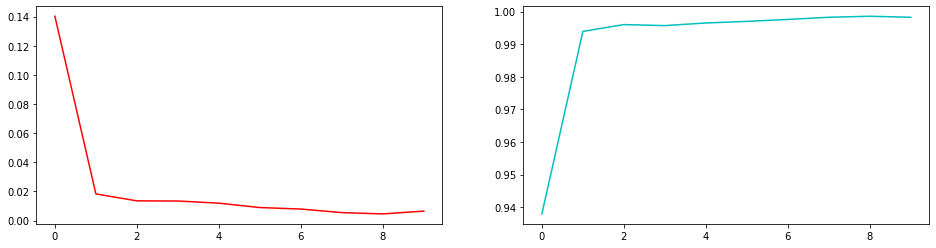

In [22]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
axes[0].plot(history.history['loss'], c='r')
axes[1].plot(history.history['accuracy'], c='c')
plt.show()

In [23]:
result900, error_index900, accuracy900 = nuc.predict_accuracy(model, x_test, y_test)

accuracy = 99.967304%


### 2 训练模型 20 * 20 

In [34]:
pulseData400, realtime400, labels400 = nuc.split_sequenceData(fileAddress='../Cs137data/numpy_data/', split_len=400)

i = 4, len = 25771, nuc is pulseCo60_10min
i = 5, len = 4472, nuc is pulseCo60_180s
i = 6, len = 4402, nuc is pulseCo60_180s
i = 7, len = 14290, nuc is pulseCs137_10min
i = 8, len = 4483, nuc is pulseCs137_180s
i = 9, len = 4483, nuc is pulseCs137_180s
i = 10, len = 4572, nuc is pulseCs137_180s
i = 11, len = 27533, nuc is pulseCsCo_10min
i = 12, len = 2010, nuc is pulseEu155_10min
i = 13, len = 25771, nuc is realtimeCo60_10min
i = 14, len = 4472, nuc is realtimeCo60_180s
i = 15, len = 4402, nuc is realtimeCo60_180s
i = 16, len = 14290, nuc is realtimeCs137_10min
i = 17, len = 4483, nuc is realtimeCs137_180s
i = 18, len = 4483, nuc is realtimeCs137_180s
i = 19, len = 4572, nuc is realtimeCs137_180s
i = 20, len = 27533, nuc is realtimeCsCo_10min
i = 21, len = 2010, nuc is realtimeEu155_10min

 time is :0m3s
pulseDataSet.shape =  (92016, 400) realtimeDataSet.shaep =  (92016, 400) nuc_index.shape =  (92016,)


In [35]:
dataSet400, labels400 = nuc.sequential_data_trans_CNN_data(pulse=pulseData400, realtime=realtime400, labels=labels400, 
                                                          Item_shape=[20, 20, 2])

len(index) = 152
pulse.shape =  (91864, 400) realtime.shape =  (91864, 400) dataSet.shape =  (91864, 20, 20, 2)


In [36]:
dataSet400[:, :, :, 0] = dataSet400[:, :, :, 0] / dataSet400[:, :, :, 0].max()
dataSet400[:, :, :, 1] = dataSet400[:, :, :, 1] / dataSet400[:, :, :, 1].max()

In [90]:
dataSet400[0, :, :, 1], labels400[0]

(array([[0.00140847, 0.00144831, 0.00206551, 0.00210534, 0.00249424,
         0.00252978, 0.00270262, 0.0032    , 0.00323892, 0.00338418,
         0.00370105, 0.00374335, 0.00466056, 0.00469948, 0.00576901,
         0.00580793, 0.00671626, 0.00704907, 0.00708585, 0.00749006],
        [0.00752898, 0.00777874, 0.00781766, 0.00823138, 0.0082703 ,
         0.00848144, 0.00883448, 0.00925003, 0.00929202, 0.00932848,
         0.00962789, 0.00966773, 0.00976978, 0.00990584, 0.0099463 ,
         0.00997939, 0.01004099, 0.01066279, 0.0107011 , 0.01109458],
        [0.01115587, 0.01127386, 0.01131431, 0.01140226, 0.01157878,
         0.01161831, 0.01239119, 0.01243134, 0.01273871, 0.01277947,
         0.01292228, 0.0129612 , 0.0130752 , 0.01399089, 0.01402429,
         0.01430255, 0.01434392, 0.01440215, 0.01444168, 0.01540763],
        [0.01544931, 0.01625283, 0.01629022, 0.01706953, 0.01710753,
         0.01752309, 0.01756354, 0.01828677, 0.01832692, 0.01865298,
         0.01869282, 0.01927754

In [54]:
x_train, y_train, x_test, y_test = nuc.split_train_test_dataSet(dataSet=dataSet400, 
                                                               labels=labels400, 
                                                               test_size=0.3, 
                                                               random_state=42)

x_train.shape= (64304, 20, 20, 2) y_train.shape= (64304,) x_test.shape= (27560, 20, 20, 2) y_test.shape= (27560,)


In [55]:
# 搭建训练层
model2 = models.Sequential()  # 线性模型
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(20, 20, 2)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))

model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(4, activation='softmax'))

model2.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [56]:
history = model2.fit(x_train, y_train, epochs=10)

Train on 64304 samples
Epoch 1/10
28672/64304 [============>.................] - ETA: 4:32 - loss: 1.3819 - accuracy: 0.43 - ETA: 1:03 - loss: 1.3366 - accuracy: 0.35 - ETA: 44s - loss: 1.2774 - accuracy: 0.3608 - ETA: 37s - loss: 1.2540 - accuracy: 0.351 - ETA: 34s - loss: 1.2289 - accuracy: 0.357 - ETA: 31s - loss: 1.2119 - accuracy: 0.347 - ETA: 29s - loss: 1.1927 - accuracy: 0.339 - ETA: 28s - loss: 1.1760 - accuracy: 0.342 - ETA: 27s - loss: 1.1607 - accuracy: 0.350 - ETA: 27s - loss: 1.1475 - accuracy: 0.349 - ETA: 26s - loss: 1.1362 - accuracy: 0.346 - ETA: 26s - loss: 1.1226 - accuracy: 0.365 - ETA: 25s - loss: 1.1075 - accuracy: 0.375 - ETA: 25s - loss: 1.0881 - accuracy: 0.400 - ETA: 24s - loss: 1.0677 - accuracy: 0.418 - ETA: 24s - loss: 1.0455 - accuracy: 0.435 - ETA: 24s - loss: 1.0198 - accuracy: 0.453 - ETA: 23s - loss: 0.9952 - accuracy: 0.465 - ETA: 23s - loss: 0.9690 - accuracy: 0.484 - ETA: 23s - loss: 0.9396 - accuracy: 0.503 - ETA: 22s - loss: 0.9222 - accuracy: 0.

31072/64304 [=============>................] - ETA: 32s - loss: 0.0016 - accuracy: 1.000 - ETA: 24s - loss: 0.0136 - accuracy: 1.000 - ETA: 23s - loss: 0.0386 - accuracy: 0.988 - ETA: 22s - loss: 0.0326 - accuracy: 0.990 - ETA: 22s - loss: 0.0395 - accuracy: 0.983 - ETA: 21s - loss: 0.0351 - accuracy: 0.985 - ETA: 21s - loss: 0.0312 - accuracy: 0.987 - ETA: 21s - loss: 0.0287 - accuracy: 0.988 - ETA: 20s - loss: 0.0296 - accuracy: 0.988 - ETA: 20s - loss: 0.0282 - accuracy: 0.989 - ETA: 20s - loss: 0.0304 - accuracy: 0.988 - ETA: 19s - loss: 0.0302 - accuracy: 0.988 - ETA: 19s - loss: 0.0280 - accuracy: 0.989 - ETA: 19s - loss: 0.0277 - accuracy: 0.989 - ETA: 19s - loss: 0.0273 - accuracy: 0.989 - ETA: 19s - loss: 0.0271 - accuracy: 0.989 - ETA: 19s - loss: 0.0260 - accuracy: 0.989 - ETA: 19s - loss: 0.0257 - accuracy: 0.990 - ETA: 19s - loss: 0.0252 - accuracy: 0.990 - ETA: 19s - loss: 0.0242 - accuracy: 0.991 - ETA: 19s - loss: 0.0235 - accuracy: 0.991 - ETA: 19s - loss: 0.0227 - acc

34272/64304 [==============>...............] - ETA: 26s - loss: 0.0022 - accuracy: 1.000 - ETA: 21s - loss: 0.0037 - accuracy: 1.000 - ETA: 20s - loss: 0.0069 - accuracy: 1.000 - ETA: 19s - loss: 0.0219 - accuracy: 0.998 - ETA: 19s - loss: 0.0223 - accuracy: 0.996 - ETA: 18s - loss: 0.0208 - accuracy: 0.995 - ETA: 18s - loss: 0.0253 - accuracy: 0.993 - ETA: 18s - loss: 0.0303 - accuracy: 0.991 - ETA: 18s - loss: 0.0327 - accuracy: 0.990 - ETA: 18s - loss: 0.0299 - accuracy: 0.991 - ETA: 18s - loss: 0.0298 - accuracy: 0.990 - ETA: 18s - loss: 0.0295 - accuracy: 0.990 - ETA: 18s - loss: 0.0298 - accuracy: 0.990 - ETA: 18s - loss: 0.0291 - accuracy: 0.990 - ETA: 18s - loss: 0.0274 - accuracy: 0.991 - ETA: 18s - loss: 0.0270 - accuracy: 0.991 - ETA: 18s - loss: 0.0291 - accuracy: 0.990 - ETA: 18s - loss: 0.0279 - accuracy: 0.991 - ETA: 18s - loss: 0.0300 - accuracy: 0.989 - ETA: 18s - loss: 0.0309 - accuracy: 0.988 - ETA: 18s - loss: 0.0313 - accuracy: 0.988 - ETA: 18s - loss: 0.0303 - acc

64304/64304 [==============================] - ETA: 9s - loss: 0.0252 - accuracy: 0.99 - ETA: 8s - loss: 0.0252 - accuracy: 0.99 - ETA: 8s - loss: 0.0250 - accuracy: 0.99 - ETA: 8s - loss: 0.0250 - accuracy: 0.99 - ETA: 8s - loss: 0.0250 - accuracy: 0.99 - ETA: 8s - loss: 0.0250 - accuracy: 0.99 - ETA: 8s - loss: 0.0249 - accuracy: 0.99 - ETA: 8s - loss: 0.0248 - accuracy: 0.99 - ETA: 8s - loss: 0.0247 - accuracy: 0.99 - ETA: 8s - loss: 0.0247 - accuracy: 0.99 - ETA: 8s - loss: 0.0246 - accuracy: 0.99 - ETA: 8s - loss: 0.0245 - accuracy: 0.99 - ETA: 8s - loss: 0.0245 - accuracy: 0.99 - ETA: 8s - loss: 0.0244 - accuracy: 0.99 - ETA: 8s - loss: 0.0243 - accuracy: 0.99 - ETA: 8s - loss: 0.0243 - accuracy: 0.99 - ETA: 8s - loss: 0.0244 - accuracy: 0.99 - ETA: 8s - loss: 0.0243 - accuracy: 0.99 - ETA: 7s - loss: 0.0242 - accuracy: 0.99 - ETA: 7s - loss: 0.0241 - accuracy: 0.99 - ETA: 7s - loss: 0.0240 - accuracy: 0.99 - ETA: 7s - loss: 0.0240 - accuracy: 0.99 - ETA: 7s - loss: 0.0240 - accu

33760/64304 [==============>...............] - ETA: 26s - loss: 4.7834e-04 - accuracy: 1.000 - ETA: 20s - loss: 0.0030 - accuracy: 1.0000    - ETA: 20s - loss: 0.0295 - accuracy: 0.990 - ETA: 20s - loss: 0.0358 - accuracy: 0.984 - ETA: 19s - loss: 0.0464 - accuracy: 0.984 - ETA: 19s - loss: 0.0400 - accuracy: 0.986 - ETA: 19s - loss: 0.0359 - accuracy: 0.988 - ETA: 19s - loss: 0.0319 - accuracy: 0.990 - ETA: 19s - loss: 0.0304 - accuracy: 0.990 - ETA: 19s - loss: 0.0296 - accuracy: 0.990 - ETA: 19s - loss: 0.0282 - accuracy: 0.990 - ETA: 19s - loss: 0.0272 - accuracy: 0.991 - ETA: 19s - loss: 0.0262 - accuracy: 0.991 - ETA: 19s - loss: 0.0245 - accuracy: 0.991 - ETA: 18s - loss: 0.0229 - accuracy: 0.992 - ETA: 18s - loss: 0.0218 - accuracy: 0.992 - ETA: 18s - loss: 0.0208 - accuracy: 0.992 - ETA: 18s - loss: 0.0204 - accuracy: 0.992 - ETA: 18s - loss: 0.0195 - accuracy: 0.993 - ETA: 18s - loss: 0.0185 - accuracy: 0.993 - ETA: 18s - loss: 0.0188 - accuracy: 0.993 - ETA: 18s - loss: 0.01

64304/64304 [==============================] - ETA: 9s - loss: 0.0165 - accuracy: 0.99 - ETA: 9s - loss: 0.0164 - accuracy: 0.99 - ETA: 9s - loss: 0.0164 - accuracy: 0.99 - ETA: 9s - loss: 0.0163 - accuracy: 0.99 - ETA: 9s - loss: 0.0163 - accuracy: 0.99 - ETA: 9s - loss: 0.0166 - accuracy: 0.99 - ETA: 9s - loss: 0.0166 - accuracy: 0.99 - ETA: 8s - loss: 0.0166 - accuracy: 0.99 - ETA: 8s - loss: 0.0166 - accuracy: 0.99 - ETA: 8s - loss: 0.0165 - accuracy: 0.99 - ETA: 8s - loss: 0.0164 - accuracy: 0.99 - ETA: 8s - loss: 0.0164 - accuracy: 0.99 - ETA: 8s - loss: 0.0163 - accuracy: 0.99 - ETA: 8s - loss: 0.0163 - accuracy: 0.99 - ETA: 8s - loss: 0.0164 - accuracy: 0.99 - ETA: 8s - loss: 0.0164 - accuracy: 0.99 - ETA: 8s - loss: 0.0166 - accuracy: 0.99 - ETA: 8s - loss: 0.0165 - accuracy: 0.99 - ETA: 8s - loss: 0.0165 - accuracy: 0.99 - ETA: 8s - loss: 0.0165 - accuracy: 0.99 - ETA: 8s - loss: 0.0164 - accuracy: 0.99 - ETA: 8s - loss: 0.0164 - accuracy: 0.99 - ETA: 8s - loss: 0.0163 - accu

35040/64304 [===============>..............] - ETA: 26s - loss: 0.0211 - accuracy: 1.000 - ETA: 21s - loss: 0.0043 - accuracy: 1.000 - ETA: 20s - loss: 0.0322 - accuracy: 0.994 - ETA: 20s - loss: 0.0234 - accuracy: 0.996 - ETA: 19s - loss: 0.0251 - accuracy: 0.994 - ETA: 19s - loss: 0.0205 - accuracy: 0.995 - ETA: 18s - loss: 0.0182 - accuracy: 0.995 - ETA: 18s - loss: 0.0166 - accuracy: 0.995 - ETA: 18s - loss: 0.0162 - accuracy: 0.995 - ETA: 18s - loss: 0.0159 - accuracy: 0.995 - ETA: 18s - loss: 0.0165 - accuracy: 0.995 - ETA: 18s - loss: 0.0168 - accuracy: 0.995 - ETA: 18s - loss: 0.0155 - accuracy: 0.995 - ETA: 18s - loss: 0.0144 - accuracy: 0.995 - ETA: 18s - loss: 0.0135 - accuracy: 0.996 - ETA: 18s - loss: 0.0127 - accuracy: 0.996 - ETA: 18s - loss: 0.0124 - accuracy: 0.996 - ETA: 18s - loss: 0.0117 - accuracy: 0.996 - ETA: 18s - loss: 0.0112 - accuracy: 0.996 - ETA: 18s - loss: 0.0116 - accuracy: 0.996 - ETA: 18s - loss: 0.0111 - accuracy: 0.996 - ETA: 18s - loss: 0.0110 - acc

64304/64304 [==============================] - ETA: 8s - loss: 0.0132 - accuracy: 0.99 - ETA: 8s - loss: 0.0131 - accuracy: 0.99 - ETA: 8s - loss: 0.0131 - accuracy: 0.99 - ETA: 8s - loss: 0.0130 - accuracy: 0.99 - ETA: 8s - loss: 0.0130 - accuracy: 0.99 - ETA: 8s - loss: 0.0130 - accuracy: 0.99 - ETA: 8s - loss: 0.0130 - accuracy: 0.99 - ETA: 8s - loss: 0.0130 - accuracy: 0.99 - ETA: 8s - loss: 0.0129 - accuracy: 0.99 - ETA: 8s - loss: 0.0129 - accuracy: 0.99 - ETA: 8s - loss: 0.0129 - accuracy: 0.99 - ETA: 8s - loss: 0.0129 - accuracy: 0.99 - ETA: 8s - loss: 0.0128 - accuracy: 0.99 - ETA: 8s - loss: 0.0129 - accuracy: 0.99 - ETA: 7s - loss: 0.0128 - accuracy: 0.99 - ETA: 7s - loss: 0.0129 - accuracy: 0.99 - ETA: 7s - loss: 0.0129 - accuracy: 0.99 - ETA: 7s - loss: 0.0128 - accuracy: 0.99 - ETA: 7s - loss: 0.0128 - accuracy: 0.99 - ETA: 7s - loss: 0.0127 - accuracy: 0.99 - ETA: 7s - loss: 0.0127 - accuracy: 0.99 - ETA: 7s - loss: 0.0126 - accuracy: 0.99 - ETA: 7s - loss: 0.0126 - accu

34336/64304 [===============>..............] - ETA: 26s - loss: 0.0074 - accuracy: 1.000 - ETA: 20s - loss: 0.0025 - accuracy: 1.000 - ETA: 20s - loss: 0.0022 - accuracy: 1.000 - ETA: 20s - loss: 0.0027 - accuracy: 1.000 - ETA: 19s - loss: 0.0022 - accuracy: 1.000 - ETA: 19s - loss: 0.0019 - accuracy: 1.000 - ETA: 19s - loss: 0.0026 - accuracy: 1.000 - ETA: 19s - loss: 0.0045 - accuracy: 0.999 - ETA: 19s - loss: 0.0052 - accuracy: 0.998 - ETA: 19s - loss: 0.0048 - accuracy: 0.998 - ETA: 19s - loss: 0.0059 - accuracy: 0.998 - ETA: 18s - loss: 0.0054 - accuracy: 0.998 - ETA: 18s - loss: 0.0058 - accuracy: 0.998 - ETA: 18s - loss: 0.0058 - accuracy: 0.997 - ETA: 18s - loss: 0.0071 - accuracy: 0.997 - ETA: 18s - loss: 0.0069 - accuracy: 0.997 - ETA: 18s - loss: 0.0077 - accuracy: 0.997 - ETA: 18s - loss: 0.0074 - accuracy: 0.997 - ETA: 18s - loss: 0.0078 - accuracy: 0.997 - ETA: 18s - loss: 0.0076 - accuracy: 0.997 - ETA: 18s - loss: 0.0073 - accuracy: 0.997 - ETA: 18s - loss: 0.0071 - acc

64304/64304 [==============================] - ETA: 8s - loss: 0.0096 - accuracy: 0.99 - ETA: 8s - loss: 0.0096 - accuracy: 0.99 - ETA: 8s - loss: 0.0096 - accuracy: 0.99 - ETA: 8s - loss: 0.0096 - accuracy: 0.99 - ETA: 8s - loss: 0.0097 - accuracy: 0.99 - ETA: 8s - loss: 0.0097 - accuracy: 0.99 - ETA: 8s - loss: 0.0098 - accuracy: 0.99 - ETA: 8s - loss: 0.0097 - accuracy: 0.99 - ETA: 8s - loss: 0.0097 - accuracy: 0.99 - ETA: 8s - loss: 0.0096 - accuracy: 0.99 - ETA: 8s - loss: 0.0096 - accuracy: 0.99 - ETA: 8s - loss: 0.0096 - accuracy: 0.99 - ETA: 8s - loss: 0.0095 - accuracy: 0.99 - ETA: 8s - loss: 0.0096 - accuracy: 0.99 - ETA: 8s - loss: 0.0097 - accuracy: 0.99 - ETA: 8s - loss: 0.0096 - accuracy: 0.99 - ETA: 8s - loss: 0.0096 - accuracy: 0.99 - ETA: 8s - loss: 0.0096 - accuracy: 0.99 - ETA: 7s - loss: 0.0095 - accuracy: 0.99 - ETA: 7s - loss: 0.0095 - accuracy: 0.99 - ETA: 7s - loss: 0.0095 - accuracy: 0.99 - ETA: 7s - loss: 0.0095 - accuracy: 0.99 - ETA: 7s - loss: 0.0095 - accu

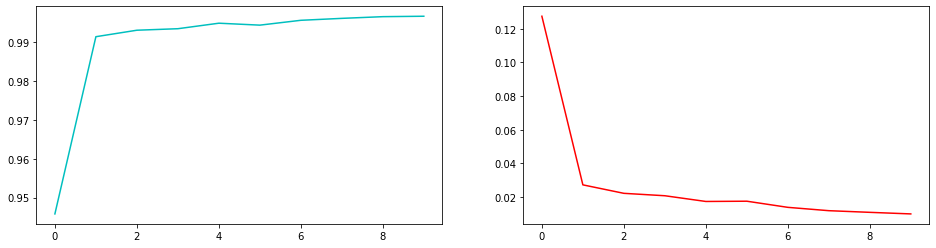

In [57]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
axes[0].plot(history.history['accuracy'], c='c')
axes[1].plot(history.history['loss'], c='r')
plt.show()

In [58]:
result400, error_index400, accuracy400 = predict_accuracy(model2, x_test, y_test)

accuracy = 99.775036%


### 3 模型训练 10 * 10 

In [67]:
pulseData, realtime, labels = nuc.split_sequenceData(fileAddress='../Cs137data/numpy_data/', split_len=100)

i = 4, len = 103086, nuc is pulseCo60_10min
i = 5, len = 17888, nuc is pulseCo60_180s
i = 6, len = 17609, nuc is pulseCo60_180s
i = 7, len = 57163, nuc is pulseCs137_10min
i = 8, len = 17933, nuc is pulseCs137_180s
i = 9, len = 17933, nuc is pulseCs137_180s
i = 10, len = 18291, nuc is pulseCs137_180s
i = 11, len = 110134, nuc is pulseCsCo_10min
i = 12, len = 8043, nuc is pulseEu155_10min
i = 13, len = 103086, nuc is realtimeCo60_10min
i = 14, len = 17888, nuc is realtimeCo60_180s
i = 15, len = 17609, nuc is realtimeCo60_180s
i = 16, len = 57163, nuc is realtimeCs137_10min
i = 17, len = 17933, nuc is realtimeCs137_180s
i = 18, len = 17933, nuc is realtimeCs137_180s
i = 19, len = 18291, nuc is realtimeCs137_180s
i = 20, len = 110134, nuc is realtimeCsCo_10min
i = 21, len = 8043, nuc is realtimeEu155_10min

 time is :0m3s
pulseDataSet.shape =  (368080, 100) realtimeDataSet.shaep =  (368080, 100) nuc_index.shape =  (368080,)


In [68]:
dataSet100, labels100 = nuc.sequential_data_trans_CNN_data(pulse=pulseData, 
                                                           realtime=realtime, 
                                                           labels=labels, 
                                                           Item_shape=[10, 10, 2])

len(index) = 383
pulse.shape =  (367697, 100) realtime.shape =  (367697, 100) dataSet.shape =  (367697, 10, 10, 2)


In [70]:
labels100[0], dataSet100[0, :, :, 1]

(2, array([[ 0.1356,  0.1616,  0.2042,  0.2304,  0.3284,  0.3542,  0.468 ,
          0.5424,  0.567 ,  0.9752],
        [ 1.043 ,  1.0686,  1.1488,  1.1746,  1.314 ,  1.564 ,  1.5912,
          2.5876,  2.8276,  2.853 ],
        [ 2.9236,  3.0616,  3.5798,  3.6044,  3.94  ,  3.9656,  4.4084,
          4.5342,  4.56  ,  4.6552],
        [ 4.6808,  4.7686,  4.7938,  5.5122,  5.5396,  5.5604,  5.5802,
          5.604 ,  5.6284,  5.9498],
        [ 5.9756,  6.2346,  6.2606,  6.655 ,  6.6814,  6.7838,  6.8088,
          6.9538,  6.9784,  7.671 ],
        [ 7.6968,  7.7776,  7.8022,  7.827 ,  7.8536,  8.4254,  8.4526,
          8.801 ,  8.826 ,  8.9052],
        [ 8.9322,  9.2134,  9.2386,  9.3182,  9.3434,  9.4814,  9.507 ,
          9.8698,  9.9944, 10.02  ],
        [10.0404, 10.0602, 10.2826, 10.308 , 10.3772, 10.579 , 10.6682,
         10.6936, 10.8174, 10.8422],
        [10.919 , 10.945 , 10.9802, 11.0068, 11.0802, 11.107 , 11.1882,
         11.2152, 11.251 , 11.2768],
        [11.7982

In [71]:
dataSet100[:, :, :, 0] = dataSet100[:, :, :, 0] / dataSet100[:, :, :, 0].max()
dataSet100[:, :, :, 1] = dataSet100[:, :, :, 1] / dataSet100[:, :, :, 1].max()

In [72]:
x_train, y_train, x_test, y_test = nuc.split_train_test_dataSet(dataSet=dataSet100,
                                                               labels=labels100,
                                                               test_size=0.3, 
                                                               random_state=42)

x_train.shape= (257387, 10, 10, 2) y_train.shape= (257387,) x_test.shape= (110310, 10, 10, 2) y_test.shape= (110310,)


In [81]:
# 搭建训练层
model = models.Sequential()  # 线性模型
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(10, 10, 2)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (2, 2), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])


In [82]:
history = model.fit(x_train, y_train, epochs=10)

Train on 257387 samples
Epoch 1/10
 66016/257387 [======>.......................] - ETA: 5:49:34 - loss: 1.3850 - accuracy: 0.218 - ETA: 1:29:13 - loss: 1.3627 - accuracy: 0.335 - ETA: 36:20 - loss: 1.3192 - accuracy: 0.3750  - ETA: 23:07 - loss: 1.2978 - accuracy: 0.359 - ETA: 16:22 - loss: 1.2627 - accuracy: 0.356 - ETA: 12:46 - loss: 1.2374 - accuracy: 0.358 - ETA: 10:16 - loss: 1.2164 - accuracy: 0.359 - ETA: 8:48 - loss: 1.2047 - accuracy: 0.353 - ETA: 7:36 - loss: 1.1832 - accuracy: 0.36 - ETA: 6:42 - loss: 1.1609 - accuracy: 0.39 - ETA: 5:57 - loss: 1.1346 - accuracy: 0.42 - ETA: 5:21 - loss: 1.0999 - accuracy: 0.45 - ETA: 4:52 - loss: 1.0686 - accuracy: 0.48 - ETA: 4:29 - loss: 1.0366 - accuracy: 0.51 - ETA: 4:11 - loss: 1.0054 - accuracy: 0.52 - ETA: 4:05 - loss: 0.9930 - accuracy: 0.53 - ETA: 3:52 - loss: 0.9684 - accuracy: 0.55 - ETA: 3:40 - loss: 0.9458 - accuracy: 0.56 - ETA: 3:28 - loss: 0.9237 - accuracy: 0.57 - ETA: 3:17 - loss: 0.9007 - accuracy: 0.58 - ETA: 3:08 - los

 92320/257387 [=========>....................] - ETA: 2:24 - loss: 0.0114 - accuracy: 1.00 - ETA: 46s - loss: 0.0727 - accuracy: 0.9766 - ETA: 40s - loss: 0.0916 - accuracy: 0.974 - ETA: 35s - loss: 0.0881 - accuracy: 0.969 - ETA: 33s - loss: 0.0857 - accuracy: 0.969 - ETA: 31s - loss: 0.0950 - accuracy: 0.966 - ETA: 30s - loss: 0.0952 - accuracy: 0.965 - ETA: 30s - loss: 0.0947 - accuracy: 0.964 - ETA: 29s - loss: 0.0979 - accuracy: 0.965 - ETA: 30s - loss: 0.0963 - accuracy: 0.966 - ETA: 31s - loss: 0.0980 - accuracy: 0.966 - ETA: 31s - loss: 0.0972 - accuracy: 0.966 - ETA: 32s - loss: 0.0958 - accuracy: 0.966 - ETA: 32s - loss: 0.0948 - accuracy: 0.966 - ETA: 31s - loss: 0.0930 - accuracy: 0.967 - ETA: 31s - loss: 0.0929 - accuracy: 0.967 - ETA: 30s - loss: 0.0922 - accuracy: 0.967 - ETA: 30s - loss: 0.0915 - accuracy: 0.967 - ETA: 30s - loss: 0.0909 - accuracy: 0.968 - ETA: 29s - loss: 0.0930 - accuracy: 0.968 - ETA: 29s - loss: 0.0921 - accuracy: 0.968 - ETA: 29s - loss: 0.0938 - 

103968/257387 [===========>..................] - ETA: 2:08 - loss: 0.1072 - accuracy: 0.96 - ETA: 30s - loss: 0.1086 - accuracy: 0.9618 - ETA: 29s - loss: 0.1061 - accuracy: 0.963 - ETA: 27s - loss: 0.1032 - accuracy: 0.965 - ETA: 26s - loss: 0.0882 - accuracy: 0.970 - ETA: 25s - loss: 0.0894 - accuracy: 0.970 - ETA: 24s - loss: 0.0878 - accuracy: 0.971 - ETA: 24s - loss: 0.0848 - accuracy: 0.973 - ETA: 23s - loss: 0.0879 - accuracy: 0.972 - ETA: 23s - loss: 0.0896 - accuracy: 0.971 - ETA: 23s - loss: 0.0868 - accuracy: 0.972 - ETA: 23s - loss: 0.0832 - accuracy: 0.973 - ETA: 22s - loss: 0.0832 - accuracy: 0.972 - ETA: 22s - loss: 0.0826 - accuracy: 0.972 - ETA: 22s - loss: 0.0818 - accuracy: 0.972 - ETA: 22s - loss: 0.0807 - accuracy: 0.973 - ETA: 22s - loss: 0.0803 - accuracy: 0.972 - ETA: 22s - loss: 0.0811 - accuracy: 0.972 - ETA: 22s - loss: 0.0814 - accuracy: 0.972 - ETA: 22s - loss: 0.0844 - accuracy: 0.971 - ETA: 22s - loss: 0.0842 - accuracy: 0.971 - ETA: 22s - loss: 0.0843 - 

257387/257387 [==============================] - ETA: 4s - loss: 0.0779 - accuracy: 0.97 - ETA: 4s - loss: 0.0779 - accuracy: 0.97 - ETA: 3s - loss: 0.0779 - accuracy: 0.97 - ETA: 3s - loss: 0.0778 - accuracy: 0.97 - ETA: 3s - loss: 0.0778 - accuracy: 0.97 - ETA: 3s - loss: 0.0778 - accuracy: 0.97 - ETA: 3s - loss: 0.0778 - accuracy: 0.97 - ETA: 3s - loss: 0.0777 - accuracy: 0.97 - ETA: 3s - loss: 0.0777 - accuracy: 0.97 - ETA: 3s - loss: 0.0777 - accuracy: 0.97 - ETA: 3s - loss: 0.0777 - accuracy: 0.97 - ETA: 3s - loss: 0.0777 - accuracy: 0.97 - ETA: 3s - loss: 0.0777 - accuracy: 0.97 - ETA: 3s - loss: 0.0777 - accuracy: 0.97 - ETA: 3s - loss: 0.0776 - accuracy: 0.97 - ETA: 3s - loss: 0.0776 - accuracy: 0.97 - ETA: 3s - loss: 0.0776 - accuracy: 0.97 - ETA: 3s - loss: 0.0776 - accuracy: 0.97 - ETA: 3s - loss: 0.0775 - accuracy: 0.97 - ETA: 3s - loss: 0.0775 - accuracy: 0.97 - ETA: 2s - loss: 0.0775 - accuracy: 0.97 - ETA: 2s - loss: 0.0775 - accuracy: 0.97 - ETA: 2s - loss: 0.0774 - ac

103104/257387 [===========>..................] - ETA: 1:52 - loss: 0.0472 - accuracy: 1.00 - ETA: 29s - loss: 0.0628 - accuracy: 0.9757 - ETA: 26s - loss: 0.0672 - accuracy: 0.973 - ETA: 25s - loss: 0.0736 - accuracy: 0.972 - ETA: 24s - loss: 0.0804 - accuracy: 0.971 - ETA: 24s - loss: 0.0758 - accuracy: 0.973 - ETA: 24s - loss: 0.0720 - accuracy: 0.974 - ETA: 23s - loss: 0.0707 - accuracy: 0.974 - ETA: 23s - loss: 0.0696 - accuracy: 0.975 - ETA: 23s - loss: 0.0680 - accuracy: 0.975 - ETA: 23s - loss: 0.0680 - accuracy: 0.975 - ETA: 23s - loss: 0.0664 - accuracy: 0.976 - ETA: 23s - loss: 0.0684 - accuracy: 0.974 - ETA: 23s - loss: 0.0679 - accuracy: 0.975 - ETA: 23s - loss: 0.0680 - accuracy: 0.975 - ETA: 23s - loss: 0.0664 - accuracy: 0.975 - ETA: 23s - loss: 0.0655 - accuracy: 0.975 - ETA: 23s - loss: 0.0651 - accuracy: 0.975 - ETA: 23s - loss: 0.0654 - accuracy: 0.975 - ETA: 23s - loss: 0.0651 - accuracy: 0.975 - ETA: 23s - loss: 0.0657 - accuracy: 0.975 - ETA: 23s - loss: 0.0658 - 

257387/257387 [==============================] - ETA: 4s - loss: 0.0674 - accuracy: 0.97 - ETA: 4s - loss: 0.0673 - accuracy: 0.97 - ETA: 3s - loss: 0.0673 - accuracy: 0.97 - ETA: 3s - loss: 0.0674 - accuracy: 0.97 - ETA: 3s - loss: 0.0673 - accuracy: 0.97 - ETA: 3s - loss: 0.0673 - accuracy: 0.97 - ETA: 3s - loss: 0.0672 - accuracy: 0.97 - ETA: 3s - loss: 0.0672 - accuracy: 0.97 - ETA: 3s - loss: 0.0672 - accuracy: 0.97 - ETA: 3s - loss: 0.0672 - accuracy: 0.97 - ETA: 3s - loss: 0.0672 - accuracy: 0.97 - ETA: 3s - loss: 0.0672 - accuracy: 0.97 - ETA: 3s - loss: 0.0673 - accuracy: 0.97 - ETA: 3s - loss: 0.0673 - accuracy: 0.97 - ETA: 3s - loss: 0.0673 - accuracy: 0.97 - ETA: 3s - loss: 0.0673 - accuracy: 0.97 - ETA: 3s - loss: 0.0673 - accuracy: 0.97 - ETA: 3s - loss: 0.0673 - accuracy: 0.97 - ETA: 3s - loss: 0.0673 - accuracy: 0.97 - ETA: 3s - loss: 0.0673 - accuracy: 0.97 - ETA: 3s - loss: 0.0673 - accuracy: 0.97 - ETA: 2s - loss: 0.0673 - accuracy: 0.97 - ETA: 2s - loss: 0.0672 - ac

104192/257387 [===========>..................] - ETA: 1:52 - loss: 0.3531 - accuracy: 0.87 - ETA: 31s - loss: 0.0737 - accuracy: 0.9706 - ETA: 27s - loss: 0.0685 - accuracy: 0.974 - ETA: 25s - loss: 0.0657 - accuracy: 0.976 - ETA: 24s - loss: 0.0651 - accuracy: 0.976 - ETA: 24s - loss: 0.0662 - accuracy: 0.976 - ETA: 24s - loss: 0.0628 - accuracy: 0.977 - ETA: 24s - loss: 0.0634 - accuracy: 0.977 - ETA: 23s - loss: 0.0600 - accuracy: 0.978 - ETA: 23s - loss: 0.0583 - accuracy: 0.979 - ETA: 23s - loss: 0.0598 - accuracy: 0.979 - ETA: 23s - loss: 0.0617 - accuracy: 0.979 - ETA: 23s - loss: 0.0608 - accuracy: 0.979 - ETA: 23s - loss: 0.0610 - accuracy: 0.979 - ETA: 23s - loss: 0.0616 - accuracy: 0.978 - ETA: 23s - loss: 0.0607 - accuracy: 0.978 - ETA: 23s - loss: 0.0596 - accuracy: 0.979 - ETA: 23s - loss: 0.0595 - accuracy: 0.979 - ETA: 23s - loss: 0.0589 - accuracy: 0.979 - ETA: 23s - loss: 0.0582 - accuracy: 0.979 - ETA: 22s - loss: 0.0591 - accuracy: 0.978 - ETA: 22s - loss: 0.0586 - 

257387/257387 [==============================] - ETA: 4s - loss: 0.0619 - accuracy: 0.97 - ETA: 3s - loss: 0.0619 - accuracy: 0.97 - ETA: 3s - loss: 0.0619 - accuracy: 0.97 - ETA: 3s - loss: 0.0619 - accuracy: 0.97 - ETA: 3s - loss: 0.0619 - accuracy: 0.97 - ETA: 3s - loss: 0.0619 - accuracy: 0.97 - ETA: 3s - loss: 0.0619 - accuracy: 0.97 - ETA: 3s - loss: 0.0619 - accuracy: 0.97 - ETA: 3s - loss: 0.0619 - accuracy: 0.97 - ETA: 3s - loss: 0.0620 - accuracy: 0.97 - ETA: 3s - loss: 0.0620 - accuracy: 0.97 - ETA: 3s - loss: 0.0619 - accuracy: 0.97 - ETA: 3s - loss: 0.0619 - accuracy: 0.97 - ETA: 3s - loss: 0.0619 - accuracy: 0.97 - ETA: 3s - loss: 0.0619 - accuracy: 0.97 - ETA: 3s - loss: 0.0619 - accuracy: 0.97 - ETA: 3s - loss: 0.0619 - accuracy: 0.97 - ETA: 3s - loss: 0.0619 - accuracy: 0.97 - ETA: 3s - loss: 0.0619 - accuracy: 0.97 - ETA: 2s - loss: 0.0619 - accuracy: 0.97 - ETA: 2s - loss: 0.0619 - accuracy: 0.97 - ETA: 2s - loss: 0.0619 - accuracy: 0.97 - ETA: 2s - loss: 0.0620 - ac

102016/257387 [==========>...................] - ETA: 1:44 - loss: 0.1021 - accuracy: 0.93 - ETA: 29s - loss: 0.0607 - accuracy: 0.9774 - ETA: 25s - loss: 0.0557 - accuracy: 0.978 - ETA: 25s - loss: 0.0547 - accuracy: 0.979 - ETA: 25s - loss: 0.0547 - accuracy: 0.979 - ETA: 25s - loss: 0.0556 - accuracy: 0.979 - ETA: 24s - loss: 0.0573 - accuracy: 0.979 - ETA: 25s - loss: 0.0563 - accuracy: 0.979 - ETA: 24s - loss: 0.0585 - accuracy: 0.979 - ETA: 24s - loss: 0.0579 - accuracy: 0.979 - ETA: 24s - loss: 0.0573 - accuracy: 0.979 - ETA: 24s - loss: 0.0560 - accuracy: 0.979 - ETA: 23s - loss: 0.0563 - accuracy: 0.979 - ETA: 23s - loss: 0.0570 - accuracy: 0.979 - ETA: 23s - loss: 0.0559 - accuracy: 0.980 - ETA: 23s - loss: 0.0556 - accuracy: 0.980 - ETA: 23s - loss: 0.0561 - accuracy: 0.979 - ETA: 23s - loss: 0.0569 - accuracy: 0.979 - ETA: 23s - loss: 0.0557 - accuracy: 0.980 - ETA: 23s - loss: 0.0564 - accuracy: 0.980 - ETA: 22s - loss: 0.0558 - accuracy: 0.980 - ETA: 22s - loss: 0.0560 - 

257387/257387 [==============================] - ETA: 5s - loss: 0.0567 - accuracy: 0.97 - ETA: 4s - loss: 0.0567 - accuracy: 0.97 - ETA: 4s - loss: 0.0568 - accuracy: 0.97 - ETA: 4s - loss: 0.0568 - accuracy: 0.97 - ETA: 4s - loss: 0.0569 - accuracy: 0.97 - ETA: 4s - loss: 0.0569 - accuracy: 0.97 - ETA: 4s - loss: 0.0569 - accuracy: 0.97 - ETA: 4s - loss: 0.0570 - accuracy: 0.97 - ETA: 4s - loss: 0.0569 - accuracy: 0.97 - ETA: 4s - loss: 0.0569 - accuracy: 0.97 - ETA: 4s - loss: 0.0569 - accuracy: 0.97 - ETA: 4s - loss: 0.0569 - accuracy: 0.97 - ETA: 4s - loss: 0.0569 - accuracy: 0.97 - ETA: 4s - loss: 0.0568 - accuracy: 0.97 - ETA: 4s - loss: 0.0568 - accuracy: 0.97 - ETA: 4s - loss: 0.0569 - accuracy: 0.97 - ETA: 4s - loss: 0.0569 - accuracy: 0.97 - ETA: 4s - loss: 0.0570 - accuracy: 0.97 - ETA: 4s - loss: 0.0569 - accuracy: 0.97 - ETA: 4s - loss: 0.0569 - accuracy: 0.97 - ETA: 3s - loss: 0.0569 - accuracy: 0.97 - ETA: 3s - loss: 0.0569 - accuracy: 0.97 - ETA: 3s - loss: 0.0569 - ac

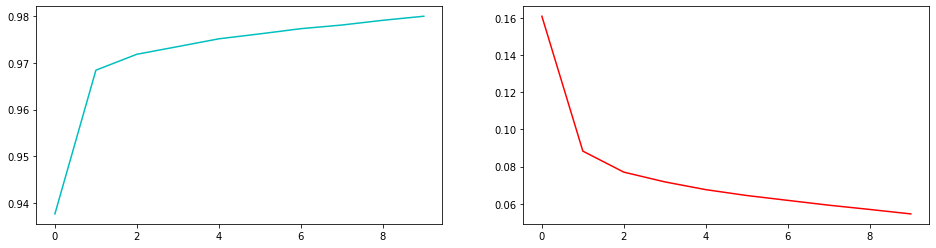

In [85]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
axes[0].plot(history.history['accuracy'], c='c')
axes[1].plot(history.history['loss'], c='r')
plt.show()

In [88]:
result, error_index, accuracy = predict_accuracy(model=model, x_test=x_test, y_test=y_test)

accuracy = 98.232255%


### 4 30cm数据

In [2]:
pulse, realtime, labels = nuc.get_file_fulldata(fileAddress='../Cs137data/lis_30cm/', split_len=900)

100%|██████████████████████████████████████████████████████████████████████████| 60001/60001 [00:53<00:00, 1125.04it/s]


i = 0, len = 816, nuc is Co60 

100%|██████████████████████████████████████████████████████████████████████████| 60001/60001 [00:52<00:00, 1148.32it/s]


i = 1, len = 793, nuc is Cs137 

100%|███████████████████████████████████████████████████████████████████████████| 60001/60001 [01:12<00:00, 823.85it/s]


i = 2, len = 1164, nuc is CsCo 

100%|██████████████████████████████████████████████████████████████████████████| 60001/60001 [00:30<00:00, 1942.07it/s]


i = 3, len = 441, nuc is Eu155 
 time is :3m33s
pulseDataSet.shape =  (3214, 900) realtimeDataSet.shaep =  (3214, 900) nuc_index.shape =  (3214,)


In [4]:
dataSet, labels = nuc.sequential_data_trans_CNN_data(pulse=pulse, 
                                                    realtime=realtime,
                                                    labels=labels,
                                                    Item_shape=[30, 30, 2])

len(index) = 37
pulse.shape =  (3177, 900) realtime.shape =  (3177, 900) dataSet.shape =  (3177, 30, 30, 2)


In [5]:
dataSet[:, :, :, 0] = dataSet[:, :, :, 0] / dataSet[:, :, :, 0].max()
dataSet[:, :, :, 1] = dataSet[:, :, :, 1] / dataSet[:, :, :, 1].max()

In [7]:
set(labels)

{1, 2, 3, 4}

In [8]:
labels = labels - 1

In [9]:
set(labels)

{0, 1, 2, 3}

In [10]:
x_train, y_train, x_test, y_test = nuc.split_train_test_dataSet(dataSet=dataSet, 
                                                                labels=labels,
                                                                test_size=0.3, 
                                                                random_state=42)

x_train.shape= (2223, 30, 30, 2) y_train.shape= (2223,) x_test.shape= (954, 30, 30, 2) y_test.shape= (954,)


In [11]:
### 搭建模型框架
# 搭建训练层
model = models.Sequential()  # 线性模型
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 2)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=10)

W1228 09:47:39.021811 11316 deprecation.py:323] From e:\anaconda\envs\deeplearning\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2223 samples
Epoch 1/10
2223/2223 [==============================] - ETA: 1:30 - loss: 1.3818 - accuracy: 0.15 - ETA: 30s - loss: 1.3564 - accuracy: 0.3021 - ETA: 15s - loss: 1.3099 - accuracy: 0.328 - ETA: 11s - loss: 1.2757 - accuracy: 0.347 - ETA: 9s - loss: 1.2396 - accuracy: 0.359 - ETA: 7s - loss: 1.1746 - accuracy: 0.41 - ETA: 6s - loss: 1.1248 - accuracy: 0.43 - ETA: 5s - loss: 1.0799 - accuracy: 0.48 - ETA: 5s - loss: 1.0316 - accuracy: 0.52 - ETA: 4s - loss: 0.9771 - accuracy: 0.55 - ETA: 4s - loss: 0.9309 - accuracy: 0.58 - ETA: 3s - loss: 0.8871 - accuracy: 0.60 - ETA: 3s - loss: 0.8469 - accuracy: 0.62 - ETA: 3s - loss: 0.8063 - accuracy: 0.64 - ETA: 2s - loss: 0.7794 - accuracy: 0.65 - ETA: 2s - loss: 0.7452 - accuracy: 0.67 - ETA: 2s - loss: 0.7105 - accuracy: 0.68 - ETA: 2s - loss: 0.6791 - accuracy: 0.70 - ETA: 1s - loss: 0.6389 - accuracy: 0.72 - ETA: 1s - loss: 0.6139 - accuracy: 0.73 - ETA: 1s - loss: 0.5884 - accuracy: 0.74 - ETA: 1s - loss: 0.5653 - accur

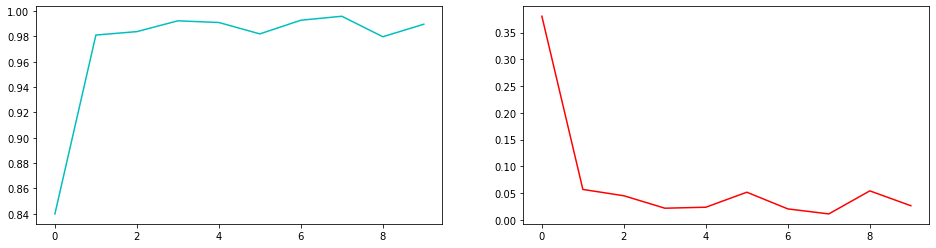

In [13]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
axes[0].plot(history.history['accuracy'], c='c')
axes[1].plot(history.history['loss'], c='r')
plt.show()

In [15]:
result, error_index, accuracy = nuc.predict_accuracy(model=model,
                                                    x_test=x_test,
                                                    y_test=y_test)

accuracy = 99.790356%


### 20*20

In [16]:
pulse, realtime, labels = nuc.get_file_fulldata(fileAddress='../Cs137data/lis_30cm/', split_len=400)

100%|██████████████████████████████████████████████████████████████████████████| 60001/60001 [00:54<00:00, 1104.12it/s]


i = 0, len = 1837, nuc is Co60 

100%|██████████████████████████████████████████████████████████████████████████| 60001/60001 [00:51<00:00, 1169.64it/s]


i = 1, len = 1784, nuc is Cs137 

100%|███████████████████████████████████████████████████████████████████████████| 60001/60001 [01:14<00:00, 802.03it/s]


i = 2, len = 2620, nuc is CsCo 

100%|██████████████████████████████████████████████████████████████████████████| 60001/60001 [00:33<00:00, 1769.97it/s]


i = 3, len = 993, nuc is Eu155 
 time is :3m38s
pulseDataSet.shape =  (7234, 400) realtimeDataSet.shaep =  (7234, 400) nuc_index.shape =  (7234,)


In [17]:
dataSet, labels = nuc.sequential_data_trans_CNN_data(pulse=pulse,
                                                    realtime=realtime,
                                                    labels=labels,
                                                    Item_shape=[20, 20, 2])

len(index) = 37
pulse.shape =  (7197, 400) realtime.shape =  (7197, 400) dataSet.shape =  (7197, 20, 20, 2)


In [25]:
labels = labels - 1 

In [18]:
dataSet[:, :, :, 0] = dataSet[:, :, :, 0] / dataSet[:, :, :, 0].max()
dataSet[:, :, :, 1] = dataSet[:, :, :, 1] / dataSet[:, :, :, 1].max()

In [26]:
x_train, y_train, x_test, y_test = nuc.split_train_test_dataSet(dataSet=dataSet, 
                                                               labels=labels,
                                                               test_size=0.3, 
                                                               random_state=42)

x_train.shape= (5037, 20, 20, 2) y_train.shape= (5037,) x_test.shape= (2160, 20, 20, 2) y_test.shape= (2160,)


In [27]:
# 搭建训练层
model = models.Sequential()  # 线性模型
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(20, 20, 2)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [28]:
history = model.fit(x_train, y_train, epochs=10)

Train on 5037 samples
Epoch 1/10
5037/5037 [==============================] - ETA: 19s - loss: 1.4231 - accuracy: 0.031 - ETA: 4s - loss: 1.3625 - accuracy: 0.333 - ETA: 3s - loss: 1.3238 - accuracy: 0.37 - ETA: 2s - loss: 1.2970 - accuracy: 0.38 - ETA: 2s - loss: 1.2745 - accuracy: 0.38 - ETA: 2s - loss: 1.2339 - accuracy: 0.41 - ETA: 1s - loss: 1.1856 - accuracy: 0.43 - ETA: 1s - loss: 1.1326 - accuracy: 0.45 - ETA: 1s - loss: 1.0719 - accuracy: 0.50 - ETA: 1s - loss: 1.0085 - accuracy: 0.54 - ETA: 1s - loss: 0.9489 - accuracy: 0.58 - ETA: 1s - loss: 0.8901 - accuracy: 0.61 - ETA: 1s - loss: 0.8394 - accuracy: 0.64 - ETA: 1s - loss: 0.7926 - accuracy: 0.66 - ETA: 1s - loss: 0.7529 - accuracy: 0.68 - ETA: 1s - loss: 0.7123 - accuracy: 0.70 - ETA: 0s - loss: 0.6773 - accuracy: 0.71 - ETA: 0s - loss: 0.6482 - accuracy: 0.72 - ETA: 0s - loss: 0.6230 - accuracy: 0.73 - ETA: 0s - loss: 0.5979 - accuracy: 0.75 - ETA: 0s - loss: 0.5754 - accuracy: 0.76 - ETA: 0s - loss: 0.5498 - accuracy: 0.

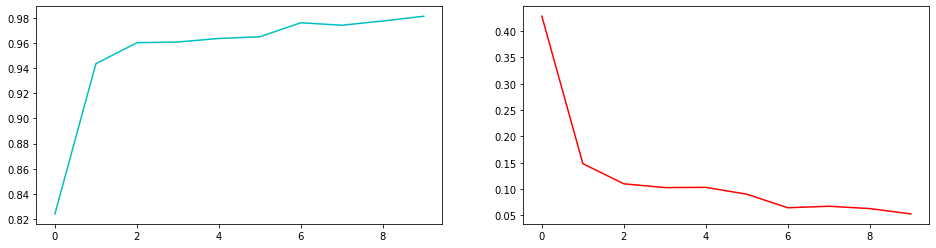

In [29]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
axes[0].plot(history.history['accuracy'], c='c')
axes[1].plot(history.history['loss'], c='r')
plt.show()

In [30]:
result, error_index, accuracy = nuc.predict_accuracy(model=model,
                                                    x_test=x_test,
                                                    y_test=y_test)

accuracy = 97.824074%


### 10 * 10 

In [3]:
pulse, realtime, labels = nuc.split_sequenceData(fileAddress='../Cs137data/numpy_data_30cm/', split_len=100)

i = 0, len = 7351, nuc is pulseCo60_10min
i = 1, len = 7137, nuc is pulseCs137_10min
i = 2, len = 10480, nuc is pulseCsCo_10min
i = 3, len = 3973, nuc is pulseEu155_10min
i = 4, len = 7351, nuc is realtimeCo60_10min
i = 5, len = 7137, nuc is realtimeCs137_10min
i = 6, len = 10480, nuc is realtimeCsCo_10min
i = 7, len = 3973, nuc is realtimeEu155_10min

 time is :0m0s
pulseDataSet.shape =  (28941, 100) realtimeDataSet.shaep =  (28941, 100) nuc_index.shape =  (28941,)


In [5]:
dataSet, labels = nuc.sequential_data_trans_CNN_data(pulse=pulse,
                                                    realtime=realtime,
                                                    labels=labels,
                                                    Item_shape=[10, 10, 2])


len(index) = 38
pulse.shape =  (28903, 100) realtime.shape =  (28903, 100) dataSet.shape =  (28903, 10, 10, 2)


In [7]:
dataSet[:, :, :, 0] = dataSet[:, :, :, 0] / dataSet[:, :, :, 0].max()
dataSet[:, :, :, 1] = dataSet[:, :, :, 1] / dataSet[:, :, :, 1].max()

In [8]:
x_train, y_train, x_test, y_test = nuc.split_train_test_dataSet(dataSet=dataSet,
                                                               labels=labels,
                                                               test_size=0.3, 
                                                               random_state=42)

x_train.shape= (20232, 10, 10, 2) y_train.shape= (20232,) x_test.shape= (8671, 10, 10, 2) y_test.shape= (8671,)


In [6]:
import dl_models as dlm

In [14]:
# 搭建训练层
model = models.Sequential()  # 线性模型
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(10, 10, 2)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (2, 2), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train, epochs=10)

W1228 11:04:56.138734 13836 deprecation.py:323] From e:\anaconda\envs\deeplearning\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 20232 samples
Epoch 1/10
20232/20232 [==============================] - ETA: 1:15 - loss: 1.3869 - accuracy: 0.34 - ETA: 7s - loss: 1.2975 - accuracy: 0.3438 - ETA: 4s - loss: 1.1829 - accuracy: 0.41 - ETA: 3s - loss: 1.0620 - accuracy: 0.50 - ETA: 3s - loss: 0.9527 - accuracy: 0.56 - ETA: 2s - loss: 0.8613 - accuracy: 0.61 - ETA: 2s - loss: 0.8013 - accuracy: 0.63 - ETA: 2s - loss: 0.7617 - accuracy: 0.66 - ETA: 2s - loss: 0.7284 - accuracy: 0.67 - ETA: 2s - loss: 0.7068 - accuracy: 0.68 - ETA: 1s - loss: 0.6855 - accuracy: 0.69 - ETA: 1s - loss: 0.6693 - accuracy: 0.70 - ETA: 1s - loss: 0.6552 - accuracy: 0.70 - ETA: 1s - loss: 0.6387 - accuracy: 0.71 - ETA: 1s - loss: 0.6226 - accuracy: 0.72 - ETA: 1s - loss: 0.6151 - accuracy: 0.73 - ETA: 1s - loss: 0.6016 - accuracy: 0.73 - ETA: 1s - loss: 0.5895 - accuracy: 0.74 - ETA: 1s - loss: 0.5787 - accuracy: 0.74 - ETA: 1s - loss: 0.5688 - accuracy: 0.75 - ETA: 1s - loss: 0.5598 - accuracy: 0.75 - ETA: 1s - loss: 0.5512 - accuracy

20232/20232 [==============================] - ETA: 3s - loss: 0.0383 - accuracy: 1.00 - ETA: 2s - loss: 0.1641 - accuracy: 0.93 - ETA: 1s - loss: 0.1626 - accuracy: 0.93 - ETA: 1s - loss: 0.1388 - accuracy: 0.94 - ETA: 1s - loss: 0.1311 - accuracy: 0.95 - ETA: 1s - loss: 0.1316 - accuracy: 0.95 - ETA: 1s - loss: 0.1285 - accuracy: 0.95 - ETA: 1s - loss: 0.1254 - accuracy: 0.95 - ETA: 1s - loss: 0.1276 - accuracy: 0.95 - ETA: 1s - loss: 0.1261 - accuracy: 0.95 - ETA: 1s - loss: 0.1249 - accuracy: 0.95 - ETA: 1s - loss: 0.1250 - accuracy: 0.95 - ETA: 1s - loss: 0.1260 - accuracy: 0.95 - ETA: 1s - loss: 0.1264 - accuracy: 0.95 - ETA: 1s - loss: 0.1241 - accuracy: 0.95 - ETA: 1s - loss: 0.1238 - accuracy: 0.95 - ETA: 1s - loss: 0.1235 - accuracy: 0.95 - ETA: 1s - loss: 0.1240 - accuracy: 0.95 - ETA: 0s - loss: 0.1235 - accuracy: 0.95 - ETA: 0s - loss: 0.1242 - accuracy: 0.95 - ETA: 0s - loss: 0.1276 - accuracy: 0.95 - ETA: 0s - loss: 0.1278 - accuracy: 0.95 - ETA: 0s - loss: 0.1298 - accu

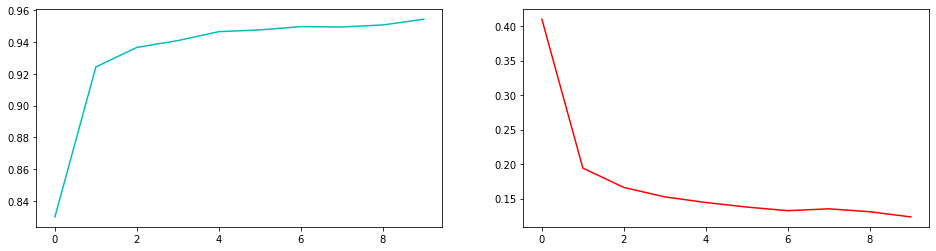

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
axes[0].plot(history.history['accuracy'], c='c')
axes[1].plot(history.history['loss'], c='r')
plt.show()

In [17]:
result, error_index, accuracy = nuc.predict_accuracy(model=model,
                                                    x_test=x_test,
                                                    y_test=y_test)

accuracy = 95.444585%


### 10cm and 30cm

In [96]:
pulse, realtime,labels = nuc.split_sequenceData(fileAddress='../Cs137data/numpy_data/',
                                                split_len=900)
pulse30, realtime30, labels30 = nuc.split_sequenceData(fileAddress='../Cs137data/numpy_data_30cm/',
                                        split_len=900)

i = 4, len = 11454, nuc is pulseCo60_10min
i = 5, len = 1987, nuc is pulseCo60_180s
i = 6, len = 1956, nuc is pulseCo60_180s
i = 7, len = 6351, nuc is pulseCs137_10min
i = 8, len = 1992, nuc is pulseCs137_180s
i = 9, len = 1992, nuc is pulseCs137_180s
i = 10, len = 2032, nuc is pulseCs137_180s
i = 11, len = 12237, nuc is pulseCsCo_10min
i = 12, len = 893, nuc is pulseEu155_10min
i = 13, len = 11454, nuc is realtimeCo60_10min
i = 14, len = 1987, nuc is realtimeCo60_180s
i = 15, len = 1956, nuc is realtimeCo60_180s
i = 16, len = 6351, nuc is realtimeCs137_10min
i = 17, len = 1992, nuc is realtimeCs137_180s
i = 18, len = 1992, nuc is realtimeCs137_180s
i = 19, len = 2032, nuc is realtimeCs137_180s
i = 20, len = 12237, nuc is realtimeCsCo_10min
i = 21, len = 893, nuc is realtimeEu155_10min

 time is :0m3s
pulseDataSet.shape =  (40894, 900) realtimeDataSet.shaep =  (40894, 900) nuc_index.shape =  (40894,)
i = 0, len = 816, nuc is pulseCo60_10min
i = 1, len = 793, nuc is pulseCs137_10min
i =

In [97]:
rng = np.random.RandomState(2)
indices = np.arange(pulse.shape[0])
rng.shuffle(indices)

In [98]:
pulse10 = pulse[indices[:pulse30.shape[0]], :]
labels10 = labels[indices[:pulse30.shape[0]]]
realtime10 = realtime[indices[:pulse30.shape[0]], :]
pulse10.shape, labels10.shape


((3214, 900), (3214,))

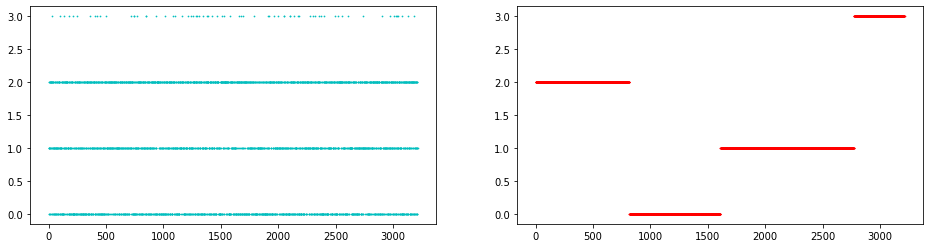

In [99]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
axes[0].scatter(range(labels10.shape[0]), labels10, c='c', s=0.5)
axes[1].scatter(range(labels30.shape[0]), labels30, c='r', s=0.5)
plt.show()

In [38]:
np.random.randint??

In [25]:
set(labels), set(labels30)

({0, 1, 2, 3}, {0, 1, 2, 3})

In [100]:
pulse = np.vstack((pulse10, pulse30))
realtime = np.vstack((realtime10, realtime30))
labels = np.vstack((labels10.reshape(labels10.shape[0], 1),labels30.reshape(labels30.shape[0], 1)))
pulse.shape, realtime.shape, labels.shape

((6428, 900), (6428, 900), (6428, 1))

In [101]:
dataSet, labels = nuc.sequential_data_trans_CNN_data(pulse=pulse, 
                                                    realtime=realtime, 
                                                    labels=labels,
                                                    Item_shape=[30, 30, 2])

len(index) = 43
pulse.shape =  (6385, 900) realtime.shape =  (6385, 900) dataSet.shape =  (6385, 30, 30, 2)


In [102]:
dataSet[:, :, :, 0] = dataSet[:, :, :, 0] / dataSet[:, :, :, 0].max()
dataSet[:, :, :, 1] = dataSet[:, :, :, 1] / dataSet[:, :, :, 1].max()

In [103]:
x_train, y_train, x_test, y_test = nuc.split_train_test_dataSet(dataSet=dataSet,
                                                               labels=labels,
                                                               test_size=0.3,
                                                               random_state=42)

x_train.shape= (4469, 30, 30, 2) y_train.shape= (4469, 1) x_test.shape= (1916, 30, 30, 2) y_test.shape= (1916, 1)


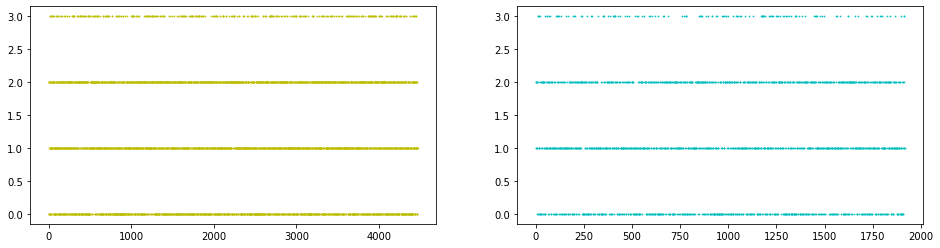

In [104]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
axes[0].scatter(range(y_train.shape[0]), y_train[:, 0], s=0.5, c='y')
axes[1].scatter(range(y_test.shape[0]), y_test[:, 0], s=0.5, c='c')
plt.show()

In [109]:
# 搭建训练层
model = models.Sequential()  # 线性模型
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(30, 30, 2)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [110]:
history = model.fit(x_train, y_train, epochs=10)

Train on 4469 samples
Epoch 1/10
4469/4469 [==============================] - ETA: 18s - loss: 1.3823 - accuracy: 0.281 - ETA: 6s - loss: 1.3705 - accuracy: 0.289 - ETA: 5s - loss: 1.3493 - accuracy: 0.33 - ETA: 4s - loss: 1.3296 - accuracy: 0.35 - ETA: 4s - loss: 1.3201 - accuracy: 0.34 - ETA: 4s - loss: 1.3119 - accuracy: 0.33 - ETA: 3s - loss: 1.2876 - accuracy: 0.33 - ETA: 3s - loss: 1.2569 - accuracy: 0.33 - ETA: 3s - loss: 1.2215 - accuracy: 0.35 - ETA: 3s - loss: 1.1866 - accuracy: 0.38 - ETA: 2s - loss: 1.1544 - accuracy: 0.40 - ETA: 2s - loss: 1.1244 - accuracy: 0.41 - ETA: 2s - loss: 1.0995 - accuracy: 0.41 - ETA: 2s - loss: 1.0775 - accuracy: 0.42 - ETA: 2s - loss: 1.0516 - accuracy: 0.44 - ETA: 2s - loss: 1.0353 - accuracy: 0.45 - ETA: 2s - loss: 1.0158 - accuracy: 0.47 - ETA: 2s - loss: 0.9947 - accuracy: 0.48 - ETA: 2s - loss: 0.9797 - accuracy: 0.50 - ETA: 2s - loss: 0.9653 - accuracy: 0.51 - ETA: 2s - loss: 0.9443 - accuracy: 0.52 - ETA: 2s - loss: 0.9320 - accuracy: 0.

4469/4469 [==============================] - ETA: 2s - loss: 0.0082 - accuracy: 1.00 - ETA: 2s - loss: 0.0696 - accuracy: 0.98 - ETA: 2s - loss: 0.0546 - accuracy: 0.99 - ETA: 2s - loss: 0.0468 - accuracy: 0.99 - ETA: 2s - loss: 0.0619 - accuracy: 0.98 - ETA: 2s - loss: 0.0906 - accuracy: 0.98 - ETA: 2s - loss: 0.1038 - accuracy: 0.97 - ETA: 2s - loss: 0.1040 - accuracy: 0.97 - ETA: 2s - loss: 0.1003 - accuracy: 0.97 - ETA: 2s - loss: 0.0935 - accuracy: 0.97 - ETA: 2s - loss: 0.0903 - accuracy: 0.97 - ETA: 2s - loss: 0.0866 - accuracy: 0.97 - ETA: 2s - loss: 0.0838 - accuracy: 0.97 - ETA: 2s - loss: 0.0830 - accuracy: 0.97 - ETA: 1s - loss: 0.0832 - accuracy: 0.97 - ETA: 1s - loss: 0.0848 - accuracy: 0.97 - ETA: 1s - loss: 0.0822 - accuracy: 0.97 - ETA: 1s - loss: 0.0849 - accuracy: 0.97 - ETA: 1s - loss: 0.0854 - accuracy: 0.97 - ETA: 1s - loss: 0.0858 - accuracy: 0.97 - ETA: 1s - loss: 0.0831 - accuracy: 0.97 - ETA: 1s - loss: 0.0837 - accuracy: 0.97 - ETA: 1s - loss: 0.0845 - accura

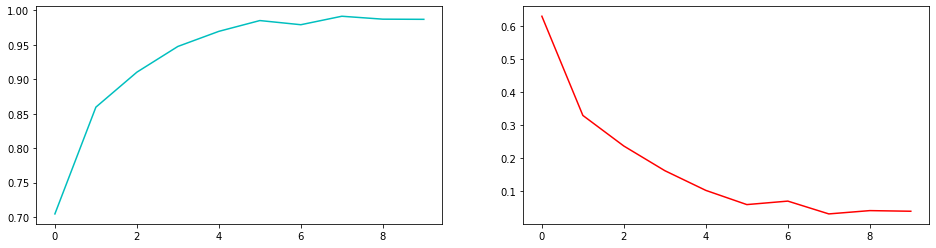

In [111]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
axes[0].plot(history.history['accuracy'], c='c')
axes[1].plot(history.history['loss'], c='r')
plt.show()

In [112]:
result, error_index, accuracy = nuc.predict_accuracy(model=model,
                                                    x_test=x_test,
                                                    y_test=y_test,
                                                    )

accuracy = 99.217119%


In [53]:
len(error_index)

25

In [21]:
layers.Dense??

### 20 * 20 

i = 4, len = 25771, nuc is pulseCo60_10min
i = 5, len = 4472, nuc is pulseCo60_180s
i = 6, len = 4402, nuc is pulseCo60_180s
i = 7, len = 14290, nuc is pulseCs137_10min
i = 8, len = 4483, nuc is pulseCs137_180s
i = 9, len = 4483, nuc is pulseCs137_180s
i = 10, len = 4572, nuc is pulseCs137_180s
i = 11, len = 27533, nuc is pulseCsCo_10min
i = 12, len = 2010, nuc is pulseEu155_10min
i = 13, len = 25771, nuc is realtimeCo60_10min
i = 14, len = 4472, nuc is realtimeCo60_180s
i = 15, len = 4402, nuc is realtimeCo60_180s
i = 16, len = 14290, nuc is realtimeCs137_10min
i = 17, len = 4483, nuc is realtimeCs137_180s
i = 18, len = 4483, nuc is realtimeCs137_180s
i = 19, len = 4572, nuc is realtimeCs137_180s
i = 20, len = 27533, nuc is realtimeCsCo_10min
i = 21, len = 2010, nuc is realtimeEu155_10min

 time is :0m3s
pulseDataSet.shape =  (92016, 400) realtimeDataSet.shaep =  (92016, 400) nuc_index.shape =  (92016,)
i = 0, len = 1837, nuc is pulseCo60_10min
i = 1, len = 1784, nuc is pulseCs137_10m

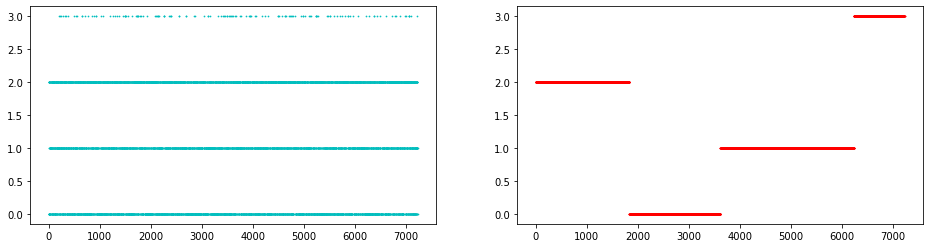

In [80]:
pulse, realtime,labels = nuc.split_sequenceData(fileAddress='../Cs137data/numpy_data/',
                                                split_len=400)
pulse30, realtime30, labels30 = nuc.split_sequenceData(fileAddress='../Cs137data/numpy_data_30cm/',
                                        split_len=400)
rng = np.random.RandomState(2)
indices = np.arange(pulse.shape[0])
rng.shuffle(indices)

pulse10 = pulse[indices[:pulse30.shape[0]], :]
labels10 = labels[indices[:pulse30.shape[0]]]
realtime10 = realtime[indices[:pulse30.shape[0]], :]

fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
axes[0].scatter(range(labels10.shape[0]), labels10, c='c', s=0.5)
axes[1].scatter(range(labels30.shape[0]), labels30, c='r', s=0.5)
plt.show()

In [81]:
pulse = np.vstack((pulse10, pulse30))
realtime = np.vstack((realtime10, realtime30))
labels = np.vstack((labels10.reshape(labels10.shape[0], 1),labels30.reshape(labels30.shape[0], 1)))
pulse.shape, realtime.shape, labels.shape

((14468, 400), (14468, 400), (14468, 1))

In [82]:
dataSet, labels = nuc.sequential_data_trans_CNN_data(pulse=pulse, 
                                                    realtime=realtime, 
                                                    labels=labels,
                                                    Item_shape=[20, 20, 2])

len(index) = 50
pulse.shape =  (14418, 400) realtime.shape =  (14418, 400) dataSet.shape =  (14418, 20, 20, 2)


In [83]:
dataSet[:, :, :, 0] = dataSet[:, :, :, 0] / dataSet[:, :, :, 0].max()
dataSet[:, :, :, 1] = dataSet[:, :, :, 1] / dataSet[:, :, :, 1].max()

In [84]:
x_train, y_train, x_test, y_test = nuc.split_train_test_dataSet(dataSet=dataSet,
                                                               labels=labels,
                                                               test_size=0.3,
                                                               random_state=42)

x_train.shape= (10092, 20, 20, 2) y_train.shape= (10092, 1) x_test.shape= (4326, 20, 20, 2) y_test.shape= (4326, 1)


In [85]:
# 搭建训练层
model = models.Sequential()  # 线性模型
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(20, 20, 2)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [86]:
history = model.fit(x_train, y_train, epochs=10)

Train on 10092 samples
Epoch 1/10
10092/10092 [==============================] - ETA: 52s - loss: 1.3818 - accuracy: 0.343 - ETA: 13s - loss: 1.3558 - accuracy: 0.343 - ETA: 8s - loss: 1.3438 - accuracy: 0.318 - ETA: 6s - loss: 1.3065 - accuracy: 0.30 - ETA: 5s - loss: 1.2608 - accuracy: 0.33 - ETA: 5s - loss: 1.2208 - accuracy: 0.35 - ETA: 4s - loss: 1.1744 - accuracy: 0.38 - ETA: 4s - loss: 1.1340 - accuracy: 0.40 - ETA: 4s - loss: 1.0930 - accuracy: 0.42 - ETA: 3s - loss: 1.0504 - accuracy: 0.45 - ETA: 3s - loss: 1.0119 - accuracy: 0.48 - ETA: 3s - loss: 0.9746 - accuracy: 0.51 - ETA: 3s - loss: 0.9361 - accuracy: 0.54 - ETA: 3s - loss: 0.9039 - accuracy: 0.56 - ETA: 3s - loss: 0.8712 - accuracy: 0.58 - ETA: 3s - loss: 0.8479 - accuracy: 0.59 - ETA: 3s - loss: 0.8252 - accuracy: 0.60 - ETA: 2s - loss: 0.8004 - accuracy: 0.61 - ETA: 2s - loss: 0.7779 - accuracy: 0.63 - ETA: 2s - loss: 0.7587 - accuracy: 0.64 - ETA: 2s - loss: 0.7439 - accuracy: 0.64 - ETA: 2s - loss: 0.7322 - accurac

10092/10092 [==============================] - ETA: 3s - loss: 0.0253 - accuracy: 1.00 - ETA: 3s - loss: 0.0649 - accuracy: 0.98 - ETA: 3s - loss: 0.0833 - accuracy: 0.97 - ETA: 3s - loss: 0.0932 - accuracy: 0.97 - ETA: 3s - loss: 0.0842 - accuracy: 0.97 - ETA: 2s - loss: 0.0797 - accuracy: 0.97 - ETA: 2s - loss: 0.0785 - accuracy: 0.98 - ETA: 2s - loss: 0.0859 - accuracy: 0.98 - ETA: 2s - loss: 0.0864 - accuracy: 0.97 - ETA: 2s - loss: 0.0860 - accuracy: 0.97 - ETA: 2s - loss: 0.0833 - accuracy: 0.97 - ETA: 2s - loss: 0.0834 - accuracy: 0.97 - ETA: 2s - loss: 0.0833 - accuracy: 0.97 - ETA: 2s - loss: 0.0817 - accuracy: 0.97 - ETA: 2s - loss: 0.0806 - accuracy: 0.97 - ETA: 2s - loss: 0.0809 - accuracy: 0.97 - ETA: 2s - loss: 0.0806 - accuracy: 0.97 - ETA: 2s - loss: 0.0816 - accuracy: 0.97 - ETA: 2s - loss: 0.0815 - accuracy: 0.97 - ETA: 2s - loss: 0.0791 - accuracy: 0.97 - ETA: 2s - loss: 0.0786 - accuracy: 0.97 - ETA: 2s - loss: 0.0787 - accuracy: 0.97 - ETA: 2s - loss: 0.0769 - accu

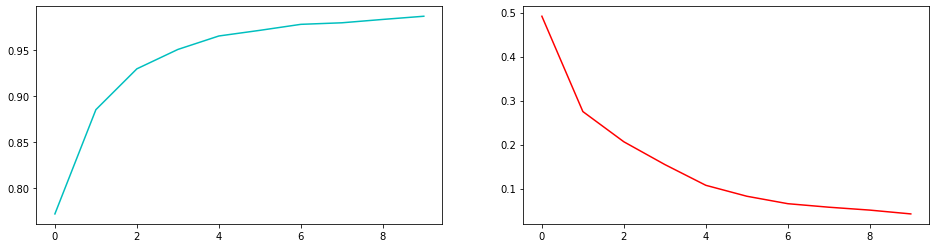

In [87]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
axes[0].plot(history.history['accuracy'], c='c')
axes[1].plot(history.history['loss'], c='r')
plt.show()

In [88]:
result, error_index, accuracy = nuc.predict_accuracy(model=model,
                                                    x_test=x_test,
                                                    y_test=y_test,
                                                    )

accuracy = 98.150717%


### 10*10 

i = 4, len = 103086, nuc is pulseCo60_10min
i = 5, len = 17888, nuc is pulseCo60_180s
i = 6, len = 17609, nuc is pulseCo60_180s
i = 7, len = 57163, nuc is pulseCs137_10min
i = 8, len = 17933, nuc is pulseCs137_180s
i = 9, len = 17933, nuc is pulseCs137_180s
i = 10, len = 18291, nuc is pulseCs137_180s
i = 11, len = 110134, nuc is pulseCsCo_10min
i = 12, len = 8043, nuc is pulseEu155_10min
i = 13, len = 103086, nuc is realtimeCo60_10min
i = 14, len = 17888, nuc is realtimeCo60_180s
i = 15, len = 17609, nuc is realtimeCo60_180s
i = 16, len = 57163, nuc is realtimeCs137_10min
i = 17, len = 17933, nuc is realtimeCs137_180s
i = 18, len = 17933, nuc is realtimeCs137_180s
i = 19, len = 18291, nuc is realtimeCs137_180s
i = 20, len = 110134, nuc is realtimeCsCo_10min
i = 21, len = 8043, nuc is realtimeEu155_10min

 time is :0m4s
pulseDataSet.shape =  (368080, 100) realtimeDataSet.shaep =  (368080, 100) nuc_index.shape =  (368080,)
i = 0, len = 7351, nuc is pulseCo60_10min
i = 1, len = 7137, nuc 

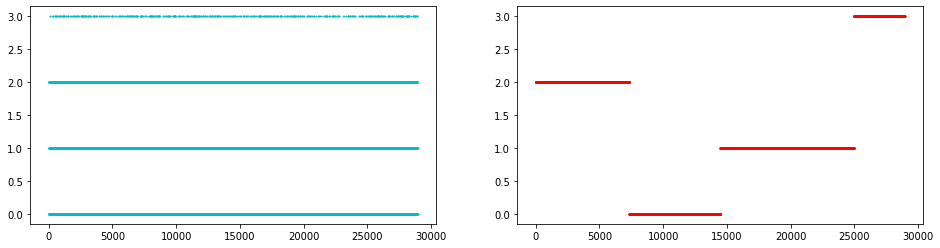

(57882, 100) (57882, 100) (57882, 1)
len(index) = 69
pulse.shape =  (57813, 100) realtime.shape =  (57813, 100) dataSet.shape =  (57813, 10, 10, 2)
x_train.shape= (40469, 10, 10, 2) y_train.shape= (40469, 1) x_test.shape= (17344, 10, 10, 2) y_test.shape= (17344, 1)


In [90]:
pulse, realtime,labels = nuc.split_sequenceData(fileAddress='../Cs137data/numpy_data/',
                                                split_len=100)
pulse30, realtime30, labels30 = nuc.split_sequenceData(fileAddress='../Cs137data/numpy_data_30cm/',
                                        split_len=100)
rng = np.random.RandomState(2)
indices = np.arange(pulse.shape[0])
rng.shuffle(indices)

pulse10 = pulse[indices[:pulse30.shape[0]], :]
labels10 = labels[indices[:pulse30.shape[0]]]
realtime10 = realtime[indices[:pulse30.shape[0]], :]

fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
axes[0].scatter(range(labels10.shape[0]), labels10, c='c', s=0.5)
axes[1].scatter(range(labels30.shape[0]), labels30, c='r', s=0.5)
plt.show()
pulse = np.vstack((pulse10, pulse30))
realtime = np.vstack((realtime10, realtime30))
labels = np.vstack((labels10.reshape(labels10.shape[0], 1),labels30.reshape(labels30.shape[0], 1)))

print(pulse.shape, realtime.shape, labels.shape)

dataSet, labels = nuc.sequential_data_trans_CNN_data(pulse=pulse, 
                                                    realtime=realtime, 
                                                    labels=labels,
                                                    Item_shape=[10, 10, 2])

dataSet[:, :, :, 0] = dataSet[:, :, :, 0] / dataSet[:, :, :, 0].max()
dataSet[:, :, :, 1] = dataSet[:, :, :, 1] / dataSet[:, :, :, 1].max()

x_train, y_train, x_test, y_test = nuc.split_train_test_dataSet(dataSet=dataSet,
                                                               labels=labels,
                                                               test_size=0.3,
                                                               random_state=42)

In [91]:
# 搭建训练层
model = models.Sequential()  # 线性模型
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(10, 10, 2)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (2, 2), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [92]:
history = model.fit(x_train, y_train, epochs=10)

Train on 40469 samples
Epoch 1/10
40469/40469 [==============================] - ETA: 2:42 - loss: 1.3773 - accuracy: 0.31 - ETA: 15s - loss: 1.3526 - accuracy: 0.3042 - ETA: 10s - loss: 1.3239 - accuracy: 0.302 - ETA: 8s - loss: 1.2946 - accuracy: 0.314 - ETA: 7s - loss: 1.2701 - accuracy: 0.32 - ETA: 6s - loss: 1.2368 - accuracy: 0.35 - ETA: 5s - loss: 1.1946 - accuracy: 0.37 - ETA: 5s - loss: 1.1538 - accuracy: 0.41 - ETA: 5s - loss: 1.1224 - accuracy: 0.43 - ETA: 5s - loss: 1.0858 - accuracy: 0.45 - ETA: 4s - loss: 1.0560 - accuracy: 0.47 - ETA: 4s - loss: 1.0286 - accuracy: 0.49 - ETA: 4s - loss: 1.0069 - accuracy: 0.50 - ETA: 4s - loss: 0.9841 - accuracy: 0.52 - ETA: 4s - loss: 0.9684 - accuracy: 0.53 - ETA: 4s - loss: 0.9513 - accuracy: 0.54 - ETA: 4s - loss: 0.9383 - accuracy: 0.54 - ETA: 4s - loss: 0.9246 - accuracy: 0.55 - ETA: 4s - loss: 0.9126 - accuracy: 0.56 - ETA: 4s - loss: 0.8978 - accuracy: 0.57 - ETA: 4s - loss: 0.8857 - accuracy: 0.57 - ETA: 4s - loss: 0.8743 - accu

40469/40469 [==============================] - ETA: 6s - loss: 0.1178 - accuracy: 0.96 - ETA: 4s - loss: 0.1735 - accuracy: 0.93 - ETA: 3s - loss: 0.1687 - accuracy: 0.93 - ETA: 3s - loss: 0.1571 - accuracy: 0.94 - ETA: 3s - loss: 0.1583 - accuracy: 0.94 - ETA: 3s - loss: 0.1551 - accuracy: 0.94 - ETA: 3s - loss: 0.1503 - accuracy: 0.94 - ETA: 3s - loss: 0.1514 - accuracy: 0.94 - ETA: 3s - loss: 0.1505 - accuracy: 0.94 - ETA: 3s - loss: 0.1569 - accuracy: 0.94 - ETA: 3s - loss: 0.1576 - accuracy: 0.94 - ETA: 3s - loss: 0.1555 - accuracy: 0.94 - ETA: 3s - loss: 0.1556 - accuracy: 0.94 - ETA: 3s - loss: 0.1543 - accuracy: 0.94 - ETA: 3s - loss: 0.1563 - accuracy: 0.94 - ETA: 3s - loss: 0.1541 - accuracy: 0.94 - ETA: 3s - loss: 0.1530 - accuracy: 0.94 - ETA: 3s - loss: 0.1514 - accuracy: 0.94 - ETA: 3s - loss: 0.1533 - accuracy: 0.94 - ETA: 3s - loss: 0.1555 - accuracy: 0.94 - ETA: 2s - loss: 0.1581 - accuracy: 0.94 - ETA: 2s - loss: 0.1571 - accuracy: 0.94 - ETA: 2s - loss: 0.1560 - accu

40469/40469 [==============================] - ETA: 7s - loss: 0.0233 - accuracy: 1.00 - ETA: 4s - loss: 0.1230 - accuracy: 0.95 - ETA: 4s - loss: 0.1293 - accuracy: 0.95 - ETA: 3s - loss: 0.1352 - accuracy: 0.94 - ETA: 3s - loss: 0.1417 - accuracy: 0.94 - ETA: 3s - loss: 0.1380 - accuracy: 0.94 - ETA: 3s - loss: 0.1306 - accuracy: 0.95 - ETA: 3s - loss: 0.1325 - accuracy: 0.95 - ETA: 3s - loss: 0.1334 - accuracy: 0.95 - ETA: 3s - loss: 0.1343 - accuracy: 0.95 - ETA: 3s - loss: 0.1338 - accuracy: 0.95 - ETA: 3s - loss: 0.1339 - accuracy: 0.95 - ETA: 3s - loss: 0.1344 - accuracy: 0.95 - ETA: 3s - loss: 0.1331 - accuracy: 0.95 - ETA: 3s - loss: 0.1317 - accuracy: 0.95 - ETA: 3s - loss: 0.1311 - accuracy: 0.95 - ETA: 3s - loss: 0.1325 - accuracy: 0.95 - ETA: 3s - loss: 0.1320 - accuracy: 0.95 - ETA: 3s - loss: 0.1324 - accuracy: 0.95 - ETA: 2s - loss: 0.1322 - accuracy: 0.95 - ETA: 2s - loss: 0.1301 - accuracy: 0.95 - ETA: 2s - loss: 0.1285 - accuracy: 0.95 - ETA: 2s - loss: 0.1287 - accu

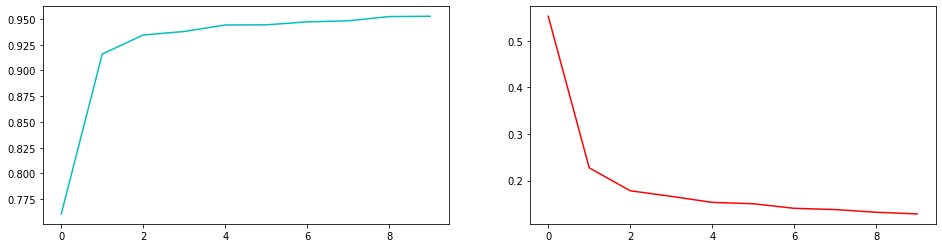

In [93]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
axes[0].plot(history.history['accuracy'], c='c')
axes[1].plot(history.history['loss'], c='r')
plt.show()

In [95]:
result, error_index, accuracy = nuc.predict_accuracy(model=model,
                                                    x_test=x_test,
                                                    y_test=y_test,
                                                    )

accuracy = 93.986393%
